In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
from matplotlib.pyplot import figure
import seaborn as sns
import os
import textwrap
from textwrap import wrap

# For NLP in one of the columns
import gensim
from gensim import corpora
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
# Uncomment this cell, Run this, comment cell, restart runtime and run everything else
# !pip install --upgrade matplotlib
# !pip install pyLDAvis
# !pip install -U gensim

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


In [ ]:
# Reading Dataset
pmg_covid_restaurant = pd.read_csv("/content/gdrive/MyDrive/PMG - Impact of COVID - Restaurant - Research Problem.csv")

In [ ]:
# Inspection of first 5 rows of DataFrame
pmg_covid_restaurant.head()

,UniqueIdentifier,q1a,q1b,q1c,q1d,q1e,q1f,q2a,q2b,q2c,q2d,q2e,q2f,q3a,q3b,q3c,q3d,q4.1,q4.2,q4.3,q4.4,q4.5,q4.6,q4.7,q4.8,q4.9,q4.10,q4_NS,q5.1,q5.2,q5.3,q5.4,q5.5,q5.6,q5.7,q5.8,q5.9,q5.10,q5_NS,q6,...,q10_None,q10_NS,q11,q11_REF,q12.1,q12.2,q12.3,q12.4,q12.5,q12.6,q12.7,q12_None,q12_NS,q13,q14,q15a,q15b,q15c,q16.1,q16.2,q16.3,q16.4,q16.5,q16.6,q16.7,q16.8,q16.9,q16_None,q16_REF,YOB,YOB_REF,MARITAL,KIDS,HH_INCOME,EDU,EMP_STATUS,GENDER_OE,GENDER_REF,URBANITY,PROV
0,13210592,5,5,6,5,6,6,5,5,6,5,6,6,5,7,10,10,1,1,1,1,1,,1,,,,,1,1,1,1,,1,1,,,,,5,...,,,30,,,,,,,,,1,,I do not know,7,3,1,4,1,,,1,,,1,,,,,1959,,1,2,7,5,1,female,,1,8
1,13210852,4,5,6,6,6,6,6,5,6,6,6,6,1,3,9,9,1,1,1,1,,,1,,,,,1,,,,,,,,,,,1,...,,,100,,1,,,,,1,,,,nothing I prefer to stay home as recommand,6,4,1,1,1,,,,,,,,,,,1950,,1,2,2,3,9,Male,,1,6
2,13210902,5,6,6,6,6,6,5,6,6,6,6,6,6,4,7,7,1,1,1,,1,,1,,,,,1,1,1,,,1,1,,,,,3,...,,,15,,,,,,,,,1,,Delivery only,6,4,1,3,1,,,,,,,,1,,,1954,,2,2,1,3,9,Feminin,,3,6
3,13210922,1,4,6,5,6,6,2,3,6,6,6,4,8,10,10,10,1,1,,,1,,1,,,,,1,,,,,,1,,,,,2,...,,,12,,1,,1,,,1,,,,Taking the temperature of every client before ...,6,3,2,2,1,,1,,,,1,,1,,,1987,,3,2,4,3,1,Male,,1,6
4,13210972,4,2,6,3,6,6,5,3,6,4,6,6,10,10,10,10,1,,1,1,1,1,1,,,,,1,,1,1,1,1,1,,,,,2,...,,,30,,1,1,1,,,1,,,,Ensure guidelines are being followed. Offer re...,98,1,3,1,1,1,1,1,,,,,1,,,1981,,1,1,4,4,1,Female,,3,5


In [ ]:
# Get Data types info for each Column
pmg_covid_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 130 entries, UniqueIdentifier to PROV
dtypes: int64(47), object(83)
memory usage: 507.9+ KB


In [ ]:
# Columns of Dataframe
pmg_covid_restaurant.columns

Index(['UniqueIdentifier', 'q1a', 'q1b', 'q1c', 'q1d', 'q1e', 'q1f', 'q2a',
       'q2b', 'q2c',
       ...
       'YOB_REF', 'MARITAL', 'KIDS', 'HH_INCOME', 'EDU', 'EMP_STATUS',
       'GENDER_OE', 'GENDER_REF', 'URBANITY', 'PROV'],
      dtype='object', length=130)

In [ ]:
# Shape of Dataframe
pmg_covid_restaurant.shape

(500, 130)

In [ ]:
# Check number of NULL values in DataFrame
pmg_covid_restaurant.isnull().sum().sum()

7

In [ ]:
# Make a copy of DataFrame so want that I want to preserve original one
pmg_covid_restaurant_copy = pmg_covid_restaurant.copy()

Mapping Column Names with Meaningful Questions for Clear Context

In [ ]:
mapping = {
    'q1a': 'Average Frequency to Dine in at a restaurant BEFORE covid',
    'q1b': 'Average Frequency to Order takeout or delivery from a restaurant BEFORE covid',
    'q1c': 'Average Frequency to Order/receive food delivery boxes BEFORE covid',
    'q1d': 'Average Frequency to Pickup ready meals from the grocery store BEFORE covid',
    'q1e': 'Average Frequency to Pickup meal kits from the grocery store BEFORE covid',
    'q1f': 'Average Frequency to Had grocery delivery or curbside pickup BEFORE covid',
    'q2a': 'Average Frequency to Dine in at a restaurant SINCE covid started',
    'q2b': 'Average Frequency to Order takeout or delivery from a restaurant SINCE covid started',
    'q2c': 'Average Frequency to Order/receive food delivery boxes SINCE covid started',
    'q2d': 'Average Frequency to Pickup ready meals from the grocery store SINCE covid started',
    'q2e': 'Average Frequency to Pickup meal kits from the grocery store SINCE covid started',
    'q2f': 'Average Frequency to Had grocery delivery or curbside pickup SINCE covid started',
    'q3a':	'Comfort Level Dining at a Restaurant via Indoors',
    'q3b':	'Comfort Level Dining at a Restaurant via Outdoors',
    'q3c':	'Comfort Level Dining at a Restaurant via Delivery',
    'q3d':	'Comfort Level Dining at a Restaurant via Takeout ',
    'q4.1': 'Face masks worn by all staff',
    'q4.2': 'Face masks worn by patrons when not eating',
    'q4.3': 'Hand sanitizer available at various points throughout the facility',
    'q4.4': 'Hand sanitizer available at every table',
    'q4.5': 'Additional cleaning and sanitization',
    'q4.6': 'Air filters/purifiers installed at the facility',
    'q4.7': 'Ensuring physical distancing (2 meters +) is in place',
    'q4.8': 'Other',
    'q4.9': 'None of the above – feel safe regardless',
    'q4.10':	'None of the above – do not feel safe',
    'q4_NS': 'Not sure',
    'q5.1': 'Face masks worn by all staff',
    'q5.2': 'Face masks worn by patrons',
    'q5.3': 'Hand sanitizer available at various points',
    'q5.4': 'Hand sanitizer available at every table',
    'q5.5': 'Air filters/purifiers installed at the facility',
    'q5.6': 'Additional cleaning and sanitization',
    'q5.7': 'Ensuring physical distancing (2 meters +) is in place',
    'q5.8': 'Other',
    'q5.9': 'None of the above – feel safe regardless',
    'q5.10': 'None of the above – do not feel safe',
    'q5_NS': 'Not sure',
    'q6': 'Last time going to a restaurant to dine-in either inside or on the patio',
    'q7': 'Last time getting take-out or delivery from a restaurant',
    'q8a': 'Satisfaction Level of Cost per person based on takeout and/or delivery experiences with any restaurants since COVID-19 began',
    'q8b': 'Satisfaction Level of Service based on takeout and/or delivery experiences with any restaurants since COVID-19 began',
    'q8c': 'Satisfaction Level of Quality of the food based on takeout and/or delivery experiences with any restaurants since COVID-19 began',
    'q8d': 'Satisfaction Level of Menu options based on takeout and/or delivery experiences with any restaurants since COVID-19 began',
    'q8e': 'Satisfaction Level of Delivery costs based on takeout and/or delivery experiences with any restaurants since COVID-19 began',
    'q8f': 'Satisfaction Level of The time it took to receive your order based on takeout and/or delivery experiences with any restaurants since COVID-19 began',
    'q8g': 'Satisfaction Level of Feeling safe/comfortable when receiving your order based on takeout and/or delivery experiences with any restaurants since COVID-19 began',
    'q8h': 'Overall satisfaction with takeout/delivery experiences based on takeout and/or delivery experiences with any restaurants since COVID-19 began',
    'q9a': 'Importance of Familiarity in restaurants BEFORE covid',
    'q9b': 'Importance of Well-established in restaurants BEFORE covid',
    'q9c': 'Importance of Trying something new in restaurants BEFORE covid',
    'q9d': 'Importance of Service in restaurants BEFORE covid',
    'q9e': 'Importance of The quality of the food in restaurants BEFORE covid',
    'q9f': 'Importance of The taste of the food in restaurants BEFORE covid', 
    'q9g': 'Importance of The atmosphere in restaurants BEFORE covid',
    'q9h': 'Importance of Music in restaurants BEFORE covid',
    'q9i': 'Importance of Outdoor dining/patio in restaurants BEFORE covid',
    'q9j': 'Importance of Wide range of menu options in restaurants BEFORE covid',
    'q9k': 'Importance of Creativity of the menu in restaurants BEFORE covid',
    'q9l': 'Importance of Sourcing local products in restaurants BEFORE covid',
    'q9m': 'Importance of Value for price paid in restaurants BEFORE covid',
    'q9n': 'Importance of Offer takeout (in-person pickup) in restaurants BEFORE covid',
    'q9o': 'Importance of Offer delivery in restaurants BEFORE covid',
    'q9p': 'Importance of Online reviews in restaurants BEFORE covid',
    'q9q': 'Importance of Recommendation from a family and/or friend in restaurants BEFORE covid',
    'q9r': 'Importance of Coupons and/or discounts available in restaurants BEFORE covid',
    'q9s': 'Importance of Availability of parking in restaurants BEFORE covid',
    'q9t': 'Importance of Focused on cleanliness and safety in restaurants BEFORE covid',
    'q10.1': 'Familiarity',
    'q10.2': 'Well-established',
    'q10.3': 'Trying something new',
    'q10.4': 'Service',
    'q10.5': 'The quality of the food',
    'q10.6': 'The taste of the food',
    'q10.7': 'The atmosphere',
    'q10.8': 'Music',
    'q10.9': 'Outdoor dining/patio',
    'q10.10': 'Wide range of menu options',
    'q10.11': 'Creativity of the menu',
    'q10.12': 'Sourcing local products',
    'q10.13': 'Value for price paid',
    'q10.14': 'Offer takeout (in-person pickup)',
    'q10.15': 'Offer delivery',
    'q10.16': 'Online reviews',
    'q10.17': 'Recommendation from a family and/or friend',
    'q10.18': 'Coupons and/or discounts available',
    'q10.19': 'Availability of parking',
    'q10.20': 'Focused on cleanliness and safety',
    'q10.21': 'Other',
    'q10_None': 'None of the above',
    'q10_NS': 'Not sure',
    'q11': 'Average Amount per person typically spent per visit when dining at a restaurant',
    'q11_REF': 'Prefer not to respond about average amount spent per visit when dining at restaurant',
    'q12.1': 'Posters/information signage at the restaurant',
    'q12.2': 'QR Code printed on the menu',
    'q12.3': 'Social media platforms',
    'q12.4': 'Email',
    'q12.5': 'Pamphlets delivered to your home',
    'q12.6': 'Information listed on the restaurant’s website',
    'q12.7': 'Other',
    'q12_None': 'Do not need to see additional protocols/information',
    'q12_NS': 'Not sure',
    'q13': 'Advice on what restaurant should do to make you feel more comfortable',
    'q14': 'Intended action in terms of returning to “normal” as COVID regulations are lifted',
    'q15a': 'Option A: You can’t wait to get back to normal OR Option B: You are embracing the changes that are happening',
    'q15b': 'Option A: You would prefer to prepare your own meals OR Option B: You would prefer to have your meals prepared for you',
    'q15c': 'Option A: You prefer to dine in at a restaurant OR Option B: You prefer to order take out or delivery',
    'q16.1': 'Facebook',
    'q16.2': 'Instagram',
    'q16.3': 'Twitter',
    'q16.4': 'Pinterest',
    'q16.5': 'LinkedIn',
    'q16.6': 'Snapchat',
    'q16.7': 'YouTube',
    'q16.8': 'Tik Tok',
    'q16.9': 'Google',
    'q16_None': 'None – do not access any of the above weekly',
    'q16_REF': 'Prefer not to respond',
    'YOB': 'Year of Birth',
    'YOB_REF': 'Prefer not to respond about Year of Birth',
    'MARITAL': 'Relationship Status',
    'KIDS': 'Any children under the age of 18 living at home',
    'HH_INCOME': 'Combined Annual Income for all members of your household before taxes',
    'EDU': 'Highest level of education completed',
    'EMP_STATUS': 'Employment status',
    'GENDER_OE': 'Gender status',
    'GENDER_REF': 'Prefer not to respond about gender status',
    'URBANITY': 'Area classification lived/reside in',
    'PROV': 'Province lived/reside in'
}

**Prior to COVID 19, on average, how frequently did you do the following?**

**1.**	Dine in at a restaurant

**2.**	Order takeout or delivery from a restaurant	

**3.**	Order/receive food delivery boxes 
(e.g. Chef’s Plate, HelloFresh, Good Food, etc.)	

**4.**	Pickup ready meals from the grocery store (e.g. rotisserie chicken and sides)							

**5.**	Pickup meal kits from the grocery store (e.g. PC Chef Meal Kits, Sobeys Easy Meals)		
					
**6.**	Had grocery delivery or curbside pickup							


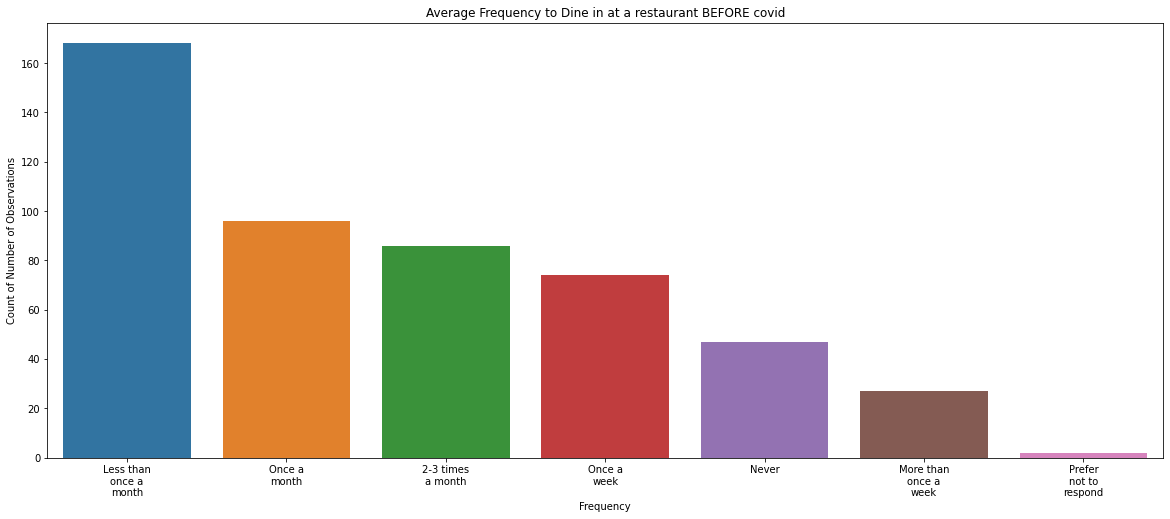

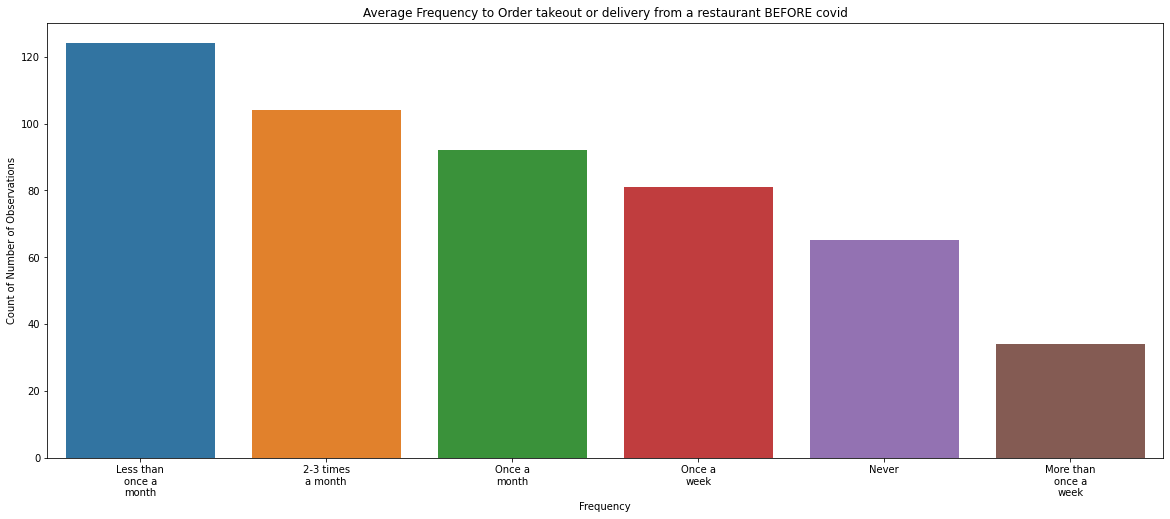

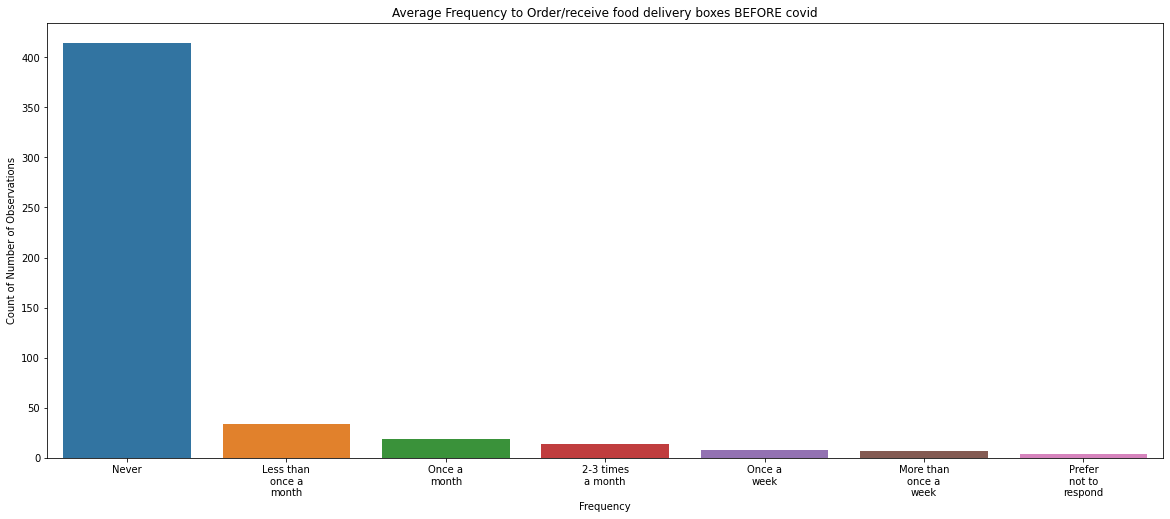

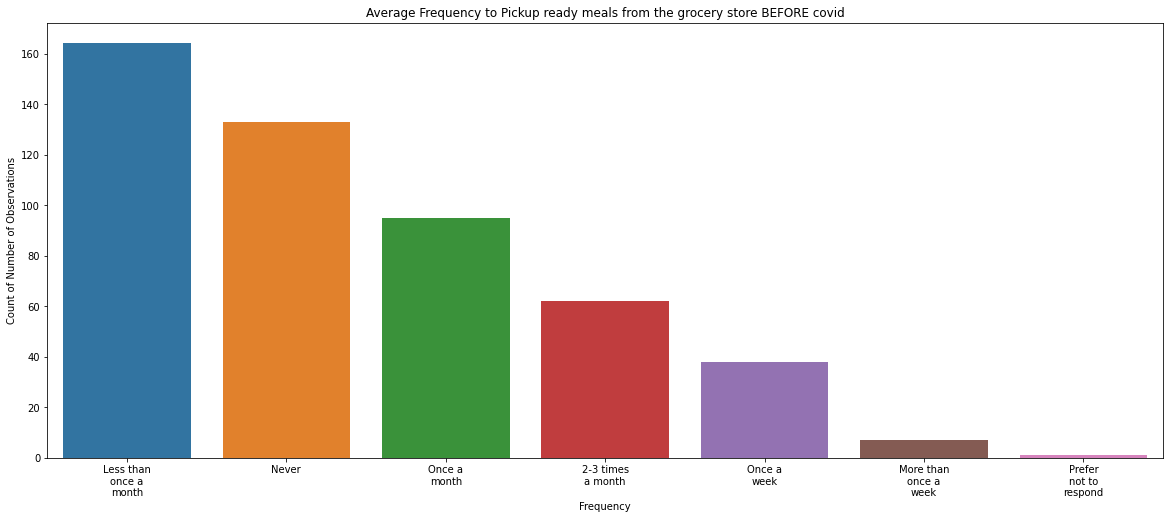

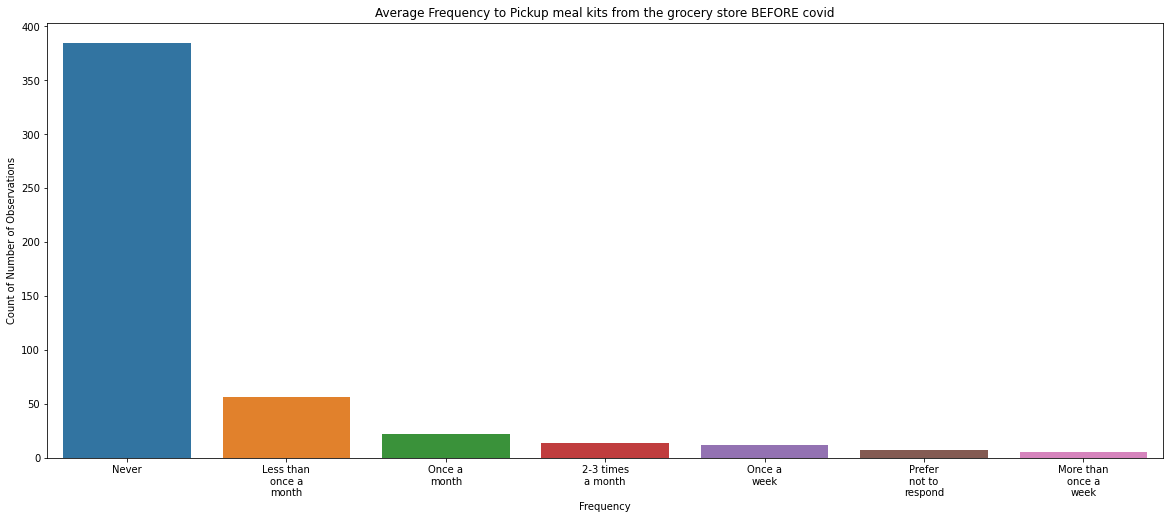

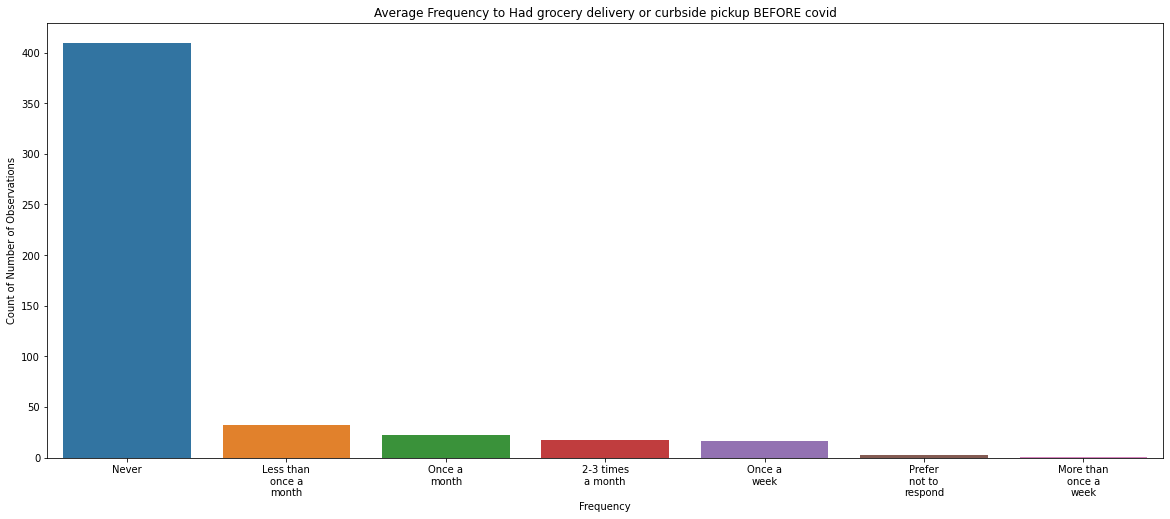

In [ ]:
before_covid_ques = ['q1a',	'q1b',	'q1c',	'q1d',	'q1e',	'q1f']

for ques in before_covid_ques:
  freq_mapping = {
    1: 'More than once a week',
    2: 'Once a week',
    3: '2-3 times a month',
    4: 'Once a month',
    5: 'Less than once a month',
    6: 'Never',
    99: 'Prefer not to respond'
}
  freq_mapping = {k: freq_mapping[k] for k in np.array(pmg_covid_restaurant_copy[ques].value_counts().index) if k in freq_mapping}
  pmg_covid_restaurant_copy[ques] = pmg_covid_restaurant_copy[ques].replace(freq_mapping)
  plt.figure(figsize=(20,8))
  ax = sns.barplot(x = pmg_covid_restaurant_copy[ques].value_counts().index, y = pmg_covid_restaurant_copy[ques].value_counts())
  lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
  ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
  ax.set_xticklabels(['\n'.join(textwrap.wrap(ticklabel.get_text(),9)) for ticklabel in ax.get_xticklabels()]) 
  ax.set_title(mapping[ques])
  ax.set_xlabel('Frequency')
  ax.set_ylabel('Count of Number of Observations')
  plt.show()
  print("    ")

**Since COVID 19 started (March 2020), on average, how frequently have you done the following?**

**1.**	Dine in at a restaurant		

**2.**	Order takeout or delivery from a restaurant	

**3.**	Order/receive food delivery boxes 
(e.g. Chef’s Plate, HelloFresh, Good Food, etc.)		

**4.**	Pickup ready meals from the grocery store (e.g. rotisserie chicken and sides)				

**5.**	Pickup meal kits from the grocery store (e.g. PC Chef Meal Kits, Sobeys Easy Meals)		
					
**6.**	Had grocery delivery or curbside pickup	

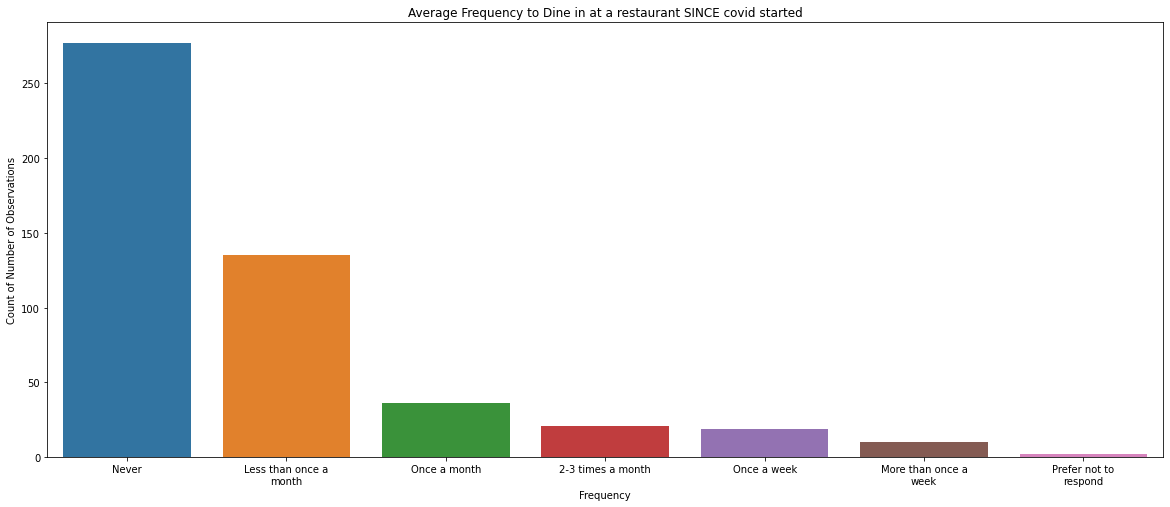

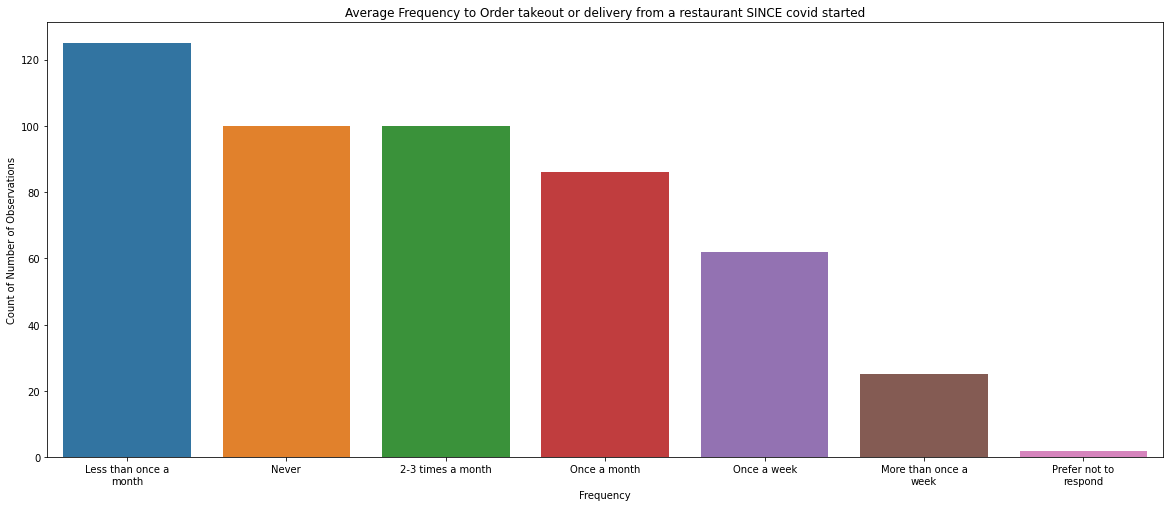

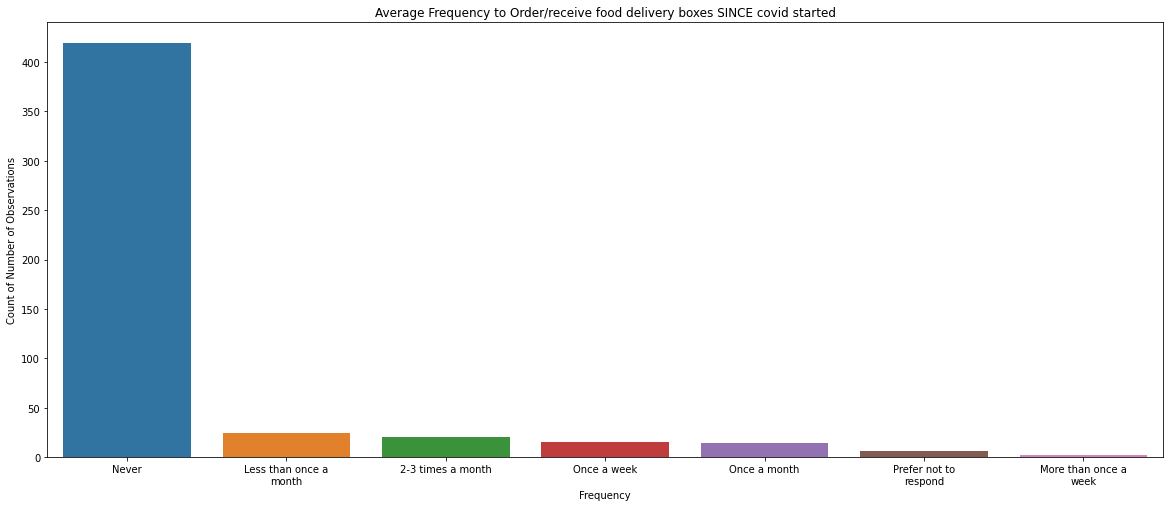

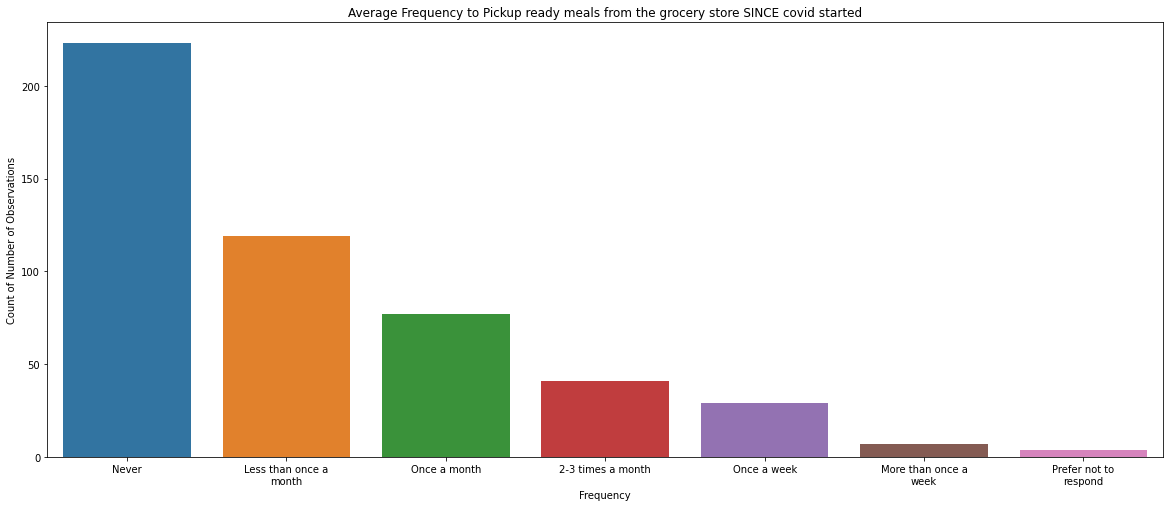

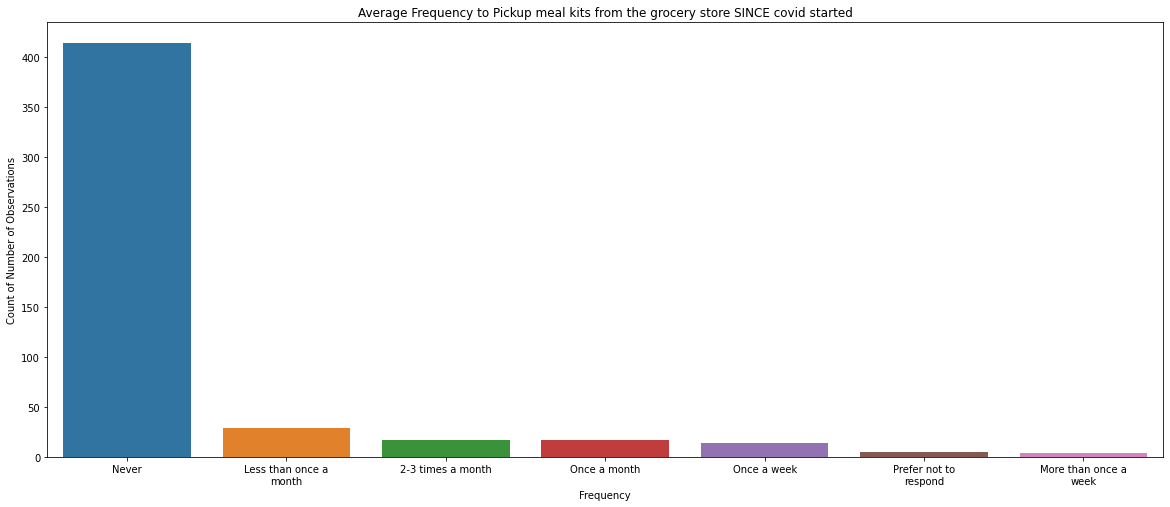

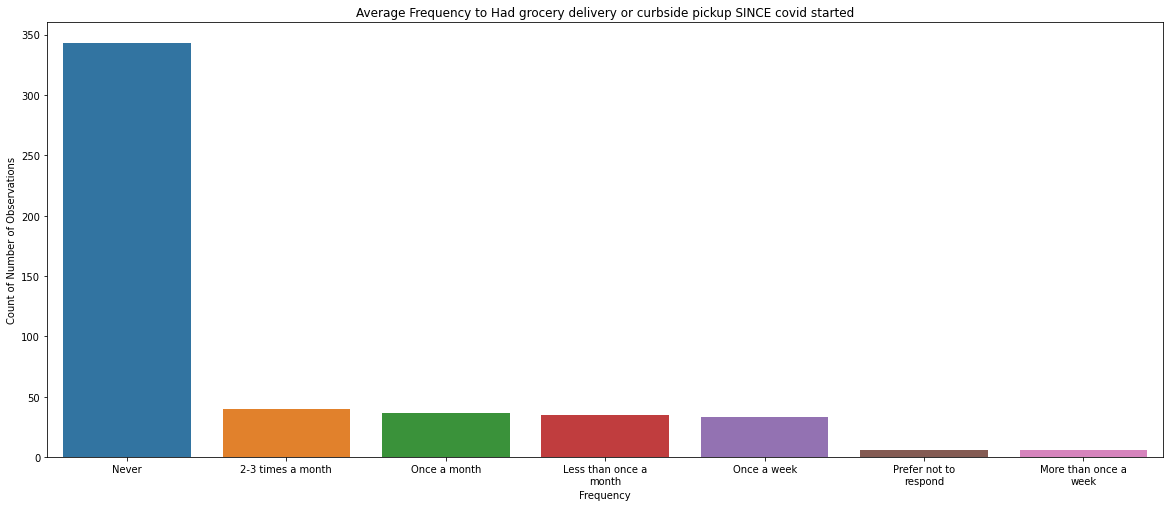

In [ ]:
since_covid_ques = ['q2a',	'q2b',	'q2c',	'q2d',	'q2e',	'q2f']

for ques in since_covid_ques:
  freq_mapping = {
    1: 'More than once a week',
    2: 'Once a week',
    3: '2-3 times a month',
    4: 'Once a month',
    5: 'Less than once a month',
    6: 'Never',
    99: 'Prefer not to respond'
}
  freq_mapping = {k: freq_mapping[k] for k in np.array(pmg_covid_restaurant_copy[ques].value_counts().index) if k in freq_mapping}
  pmg_covid_restaurant_copy[ques] = pmg_covid_restaurant_copy[ques].replace(freq_mapping)
  plt.figure(figsize=(20,8))
  ax = sns.barplot(x = pmg_covid_restaurant_copy[ques].value_counts().index, y = pmg_covid_restaurant_copy[ques].value_counts())
  lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
  ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
  ax.set_title(mapping[ques])
  ax.set_xlabel('Frequency')
  ax.set_ylabel('Count of Number of Observations')
  plt.show()
  print("    ")

**How comfortable would you be dining at a restaurant today via the following types?**

**1.** Indoors

**2.** Outdoors

**3.** Delivery

**4.** Takeout

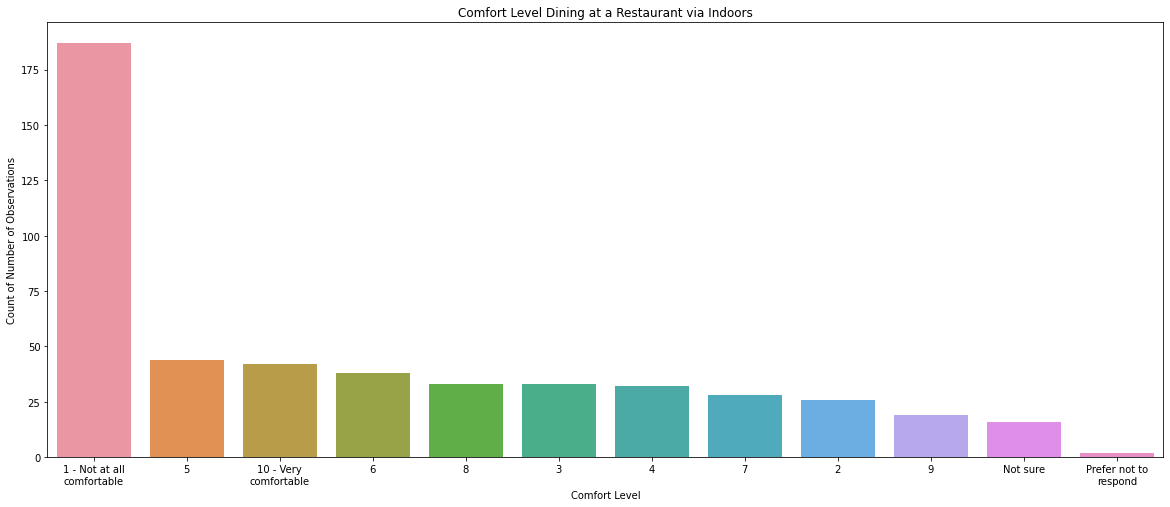

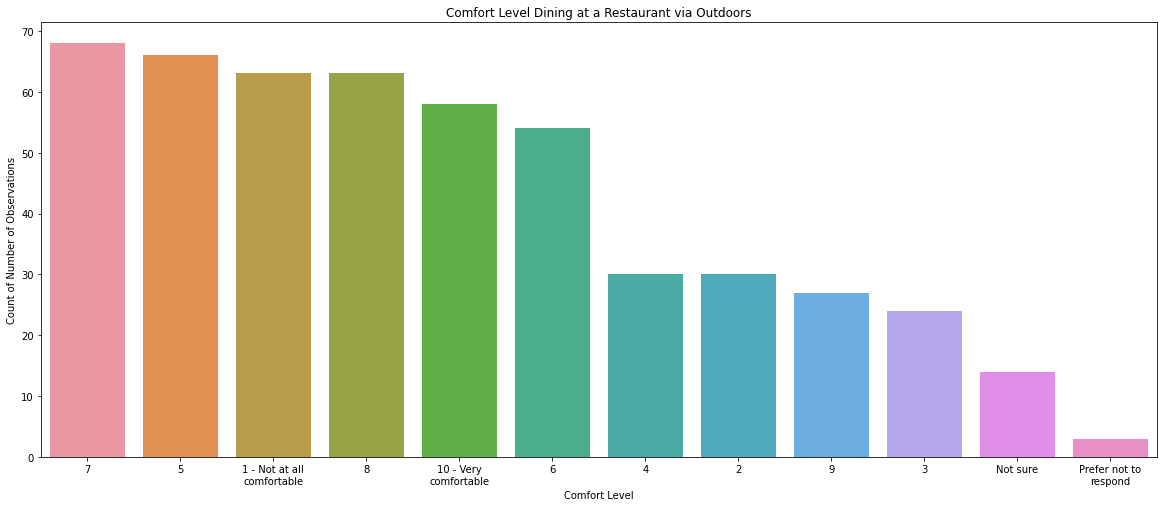

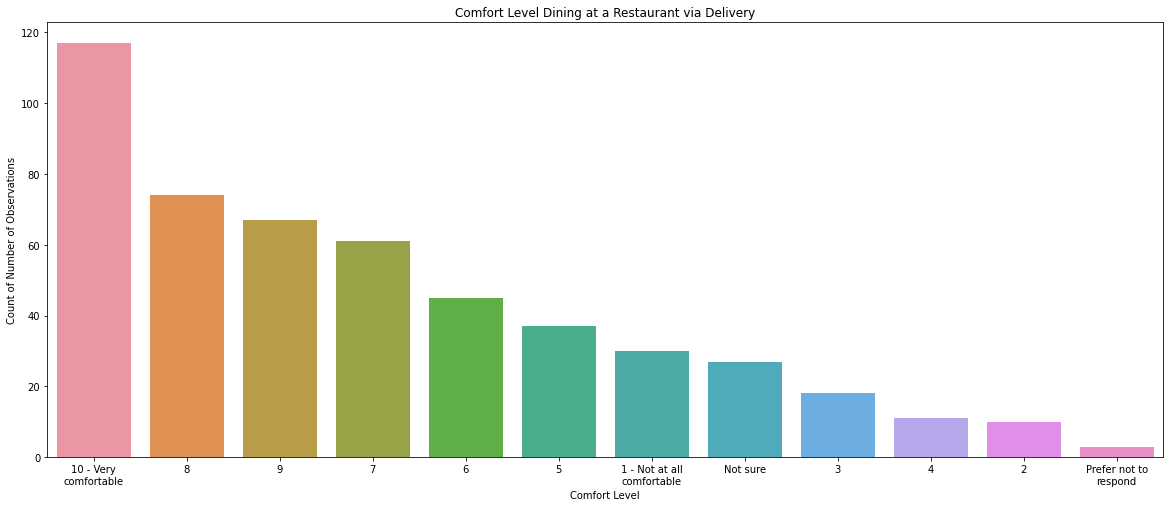

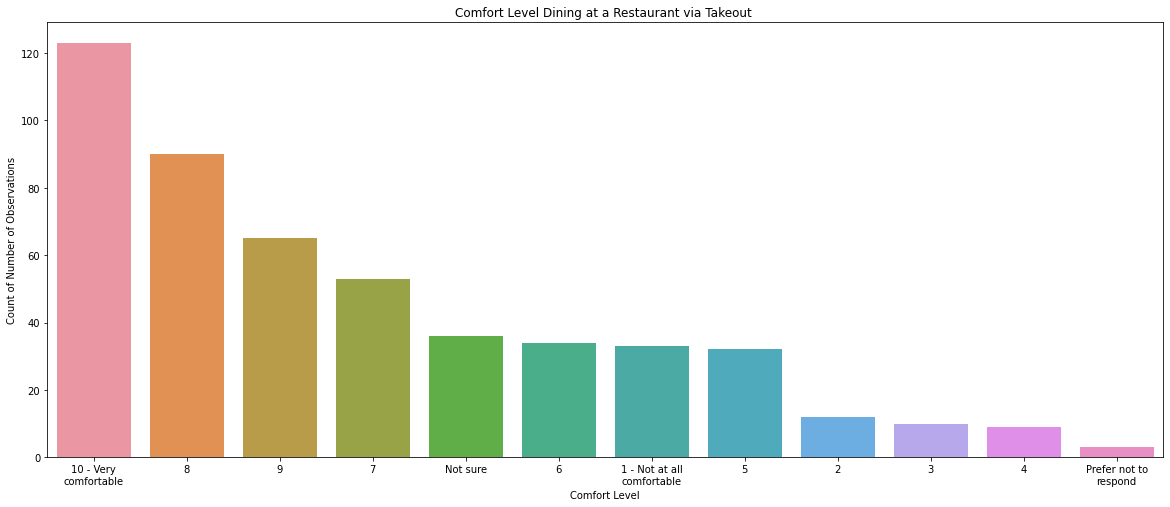

In [ ]:
comf_ques = ['q3a',	'q3b',	'q3c',	'q3d']

for ques in comf_ques:
  comf_mapping = {
    1: '1 - Not at all comfortable',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Very comfortable',
    98: 'Not sure',
    99: 'Prefer not to respond'
}
  comf_mapping = {k: comf_mapping[k] for k in np.array(pmg_covid_restaurant_copy[ques].value_counts().index) if k in comf_mapping}
  pmg_covid_restaurant_copy[ques] = pmg_covid_restaurant_copy[ques].replace(comf_mapping)
  plt.figure(figsize=(20,8))
  ax = sns.barplot(x = pmg_covid_restaurant_copy[ques].value_counts().index, y = pmg_covid_restaurant_copy[ques].value_counts())
  lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
  ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
  ax.set_title(mapping[ques])
  ax.set_xlabel('Comfort Level')
  ax.set_ylabel('Count of Number of Observations')
  plt.show()
  print("    ")

**Which of the following would need to be in place at a restaurant for you to feel comfortable dining onsite indoors?**

**1.** Face masks worn by all staff

**2.** Face masks worn by patrons when not eating

**3.** Hand sanitizer available at various points throughout the facility

**4.** Hand sanitizer available at every table

**5.** Additional cleaning and sanitization

**6.** Air filters/purifiers installed at the facility

**7.** Ensuring physical distancing (2 meters +) is in place

**8.** Other

**9.** None of the above – feel safe regardless

**10.** None of the above – do not feel safe

**11.** Not sure


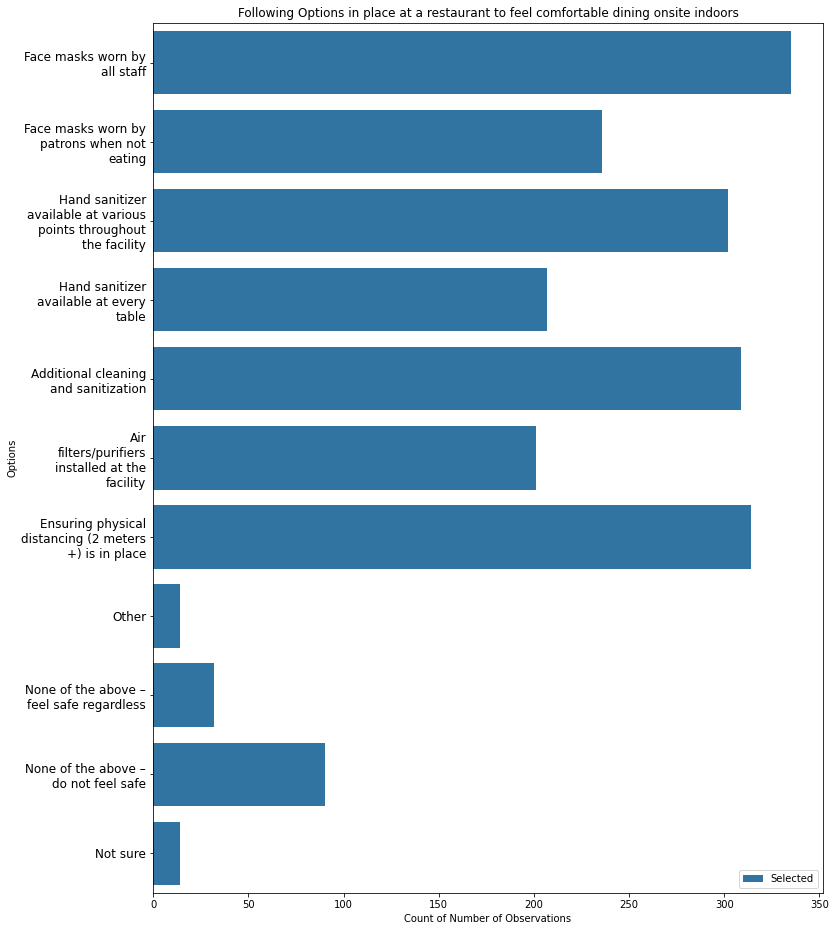

In [ ]:
options = ['q4.1',	'q4.2',	'q4.3',	'q4.4', 'q4.5',
           'q4.6', 'q4.7', 'q4.8', 'q4.9', 'q4.10', 'q4_NS']

options_mapping = {key: mapping[key] for key in options}

df = pd.melt(pmg_covid_restaurant_copy[options])
plt.figure(figsize=(12,16))
ax = sns.countplot(data = df.loc[df['value'] == '1'], y = 'variable', hue = 'value')
ax.set_yticks(range(len(options_mapping)))
ax.set_yticklabels(('\n'.join(wrap(l, 20)) for l in options_mapping.values()), rotation='horizontal', fontsize=12)
ax.legend(loc='lower right', labels=['Selected'])
ax.set_title('Following Options in place at a restaurant to feel comfortable dining onsite indoors')
ax.set_ylabel('Options')
ax.set_xlabel('Count of Number of Observations')
plt.show()
print("    ")

**Which of the following would need to be in place at a restaurant for you to feel comfortable dining onsite outdoors (patio)?** 

**1.** Face masks worn by all staff

**2.** Face masks worn by patrons when not eating

**3.** Hand sanitizer available at various points throughout the facility

**4.** Hand sanitizer available at every table

**5.** Air filters/purifiers installed at the facility

**6.** Additional cleaning and sanitization

**7.** Ensuring physical distancing (2 meters +) is in place

**8.** Other

**9.** None of the above – feel safe regardless

**10.** None of the above – do not feel safe

**11.** Not sure


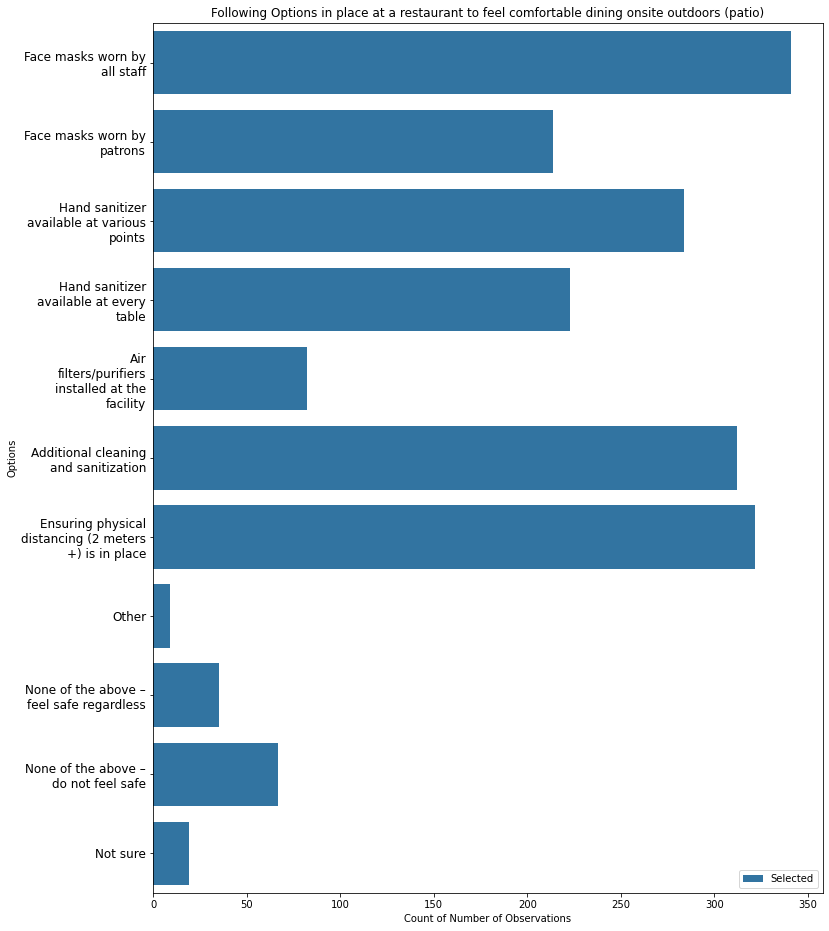

In [ ]:
options = ['q5.1',	'q5.2',	'q5.3',	'q5.4', 'q5.5',
           'q5.6', 'q5.7', 'q5.8', 'q5.9', 'q5.10', 'q5_NS']

options_mapping = {key: mapping[key] for key in options}

df = pd.melt(pmg_covid_restaurant_copy[options])
plt.figure(figsize=(12,16))
ax = sns.countplot(data = df.loc[df['value'] == '1'], y = 'variable', hue = 'value') 
ax.set_yticks(range(len(options_mapping)))
ax.set_yticklabels(('\n'.join(wrap(l, 20)) for l in options_mapping.values()), rotation='horizontal', fontsize=12)
ax.legend(loc='lower right', labels=['Selected'])
ax.set_title('Following Options in place at a restaurant to feel comfortable dining onsite outdoors (patio)')
ax.set_ylabel('Options')
ax.set_xlabel('Count of Number of Observations')
plt.show()
print("    ")

**When was the last time you went to a restaurant to dine-in either inside or on the patio?**

**1.** Before COVID-19 (March 2020)

**2.** In the last week

**3.** In the last 2-3 weeks

**4.** In the last month

**5.** More than a month ago (but since March 2020)

**6.** Not sure

**7.** Prefer not to respond
 



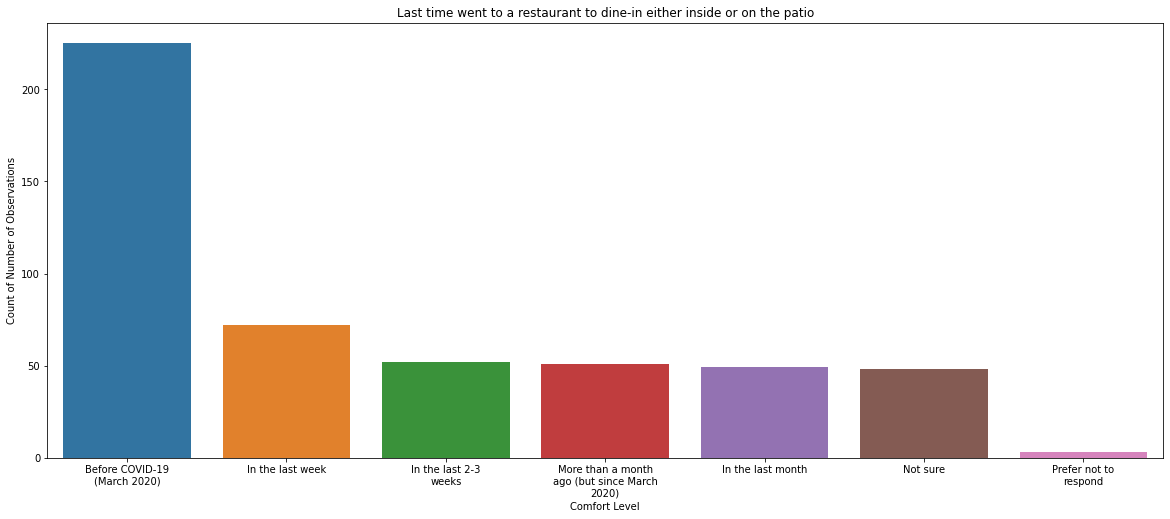

In [ ]:
time_mapping = {
    1: 'Before COVID-19 (March 2020)',
    2: 'In the last week',
    3: 'In the last 2-3 weeks',
    4: 'In the last month',
    5: 'More than a month ago (but since March 2020)',
    98: 'Not sure',
    99: 'Prefer not to respond'
}
time_mapping = {k: time_mapping[k] for k in np.array(pmg_covid_restaurant_copy['q6'].value_counts().index) if k in time_mapping}
pmg_covid_restaurant_copy['q6'] = pmg_covid_restaurant_copy['q6'].replace(time_mapping)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pmg_covid_restaurant_copy['q6'].value_counts().index, y = pmg_covid_restaurant_copy['q6'].value_counts())
lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
ax.set_title('Last time went to a restaurant to dine-in either inside or on the patio')
ax.set_xlabel('Comfort Level')
ax.set_ylabel('Count of Number of Observations')
plt.show()
print("    ")

**When was the last time you got take-out or delivery from a restaurant?**

**1.** Before COVID-19 (March 2020)

**2.** In the last week

**3.** In the last 2-3 weeks

**4.** In the last month

**5.** More than a month ago (but since March 2020)

**98.** Not sure

**99.** Prefer not to respond


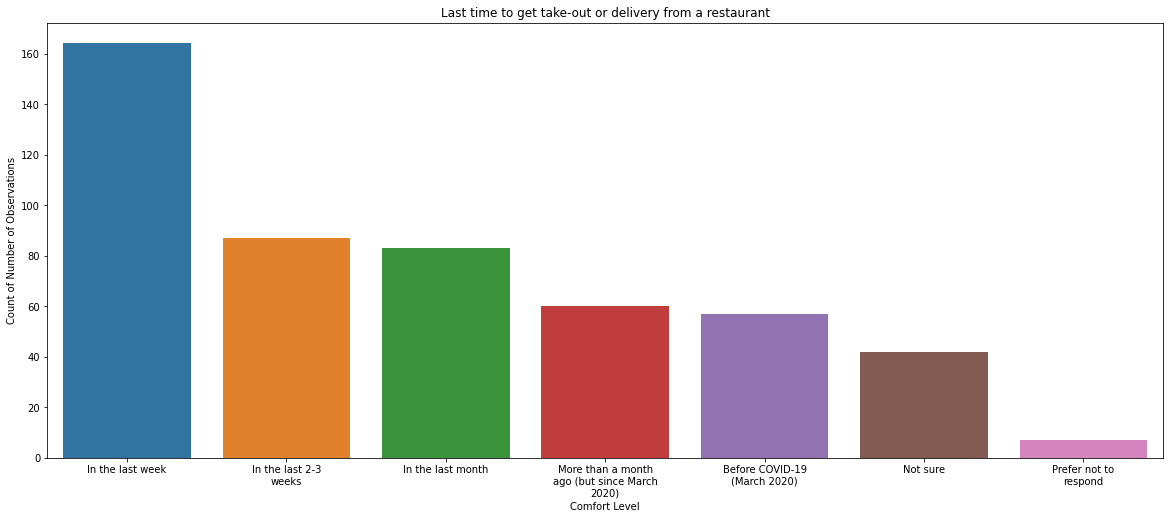

In [ ]:
time_mapping = {
    1: 'Before COVID-19 (March 2020)',
    2: 'In the last week',
    3: 'In the last 2-3 weeks',
    4: 'In the last month',
    5: 'More than a month ago (but since March 2020)',
    98: 'Not sure',
    99: 'Prefer not to respond'
}
time_mapping = {k: time_mapping[k] for k in np.array(pmg_covid_restaurant_copy['q7'].value_counts().index) if k in time_mapping}
pmg_covid_restaurant_copy['q7'] = pmg_covid_restaurant_copy['q7'].replace(time_mapping)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pmg_covid_restaurant_copy['q7'].value_counts().index, y = pmg_covid_restaurant_copy['q7'].value_counts())
lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
ax.set_title('Last time to get take-out or delivery from a restaurant')
ax.set_xlabel('Comfort Level')
ax.set_ylabel('Count of Number of Observations')
plt.show()
print("    ")

**How satisfied have you been with your takeout and/or delivery experience(s) with any restaurant(s) you have frequented since COVID-19 began?**

**1.**	Cost per person	
											
**2.**	Service				

**3.**	Quality of the food		

**4.**	Menu options			

**5.**	Delivery costs 	

**6.**	The time it took to receive your order

**7.**	Feeling safe/comfortable when receiving your order

**8.**	Overall satisfaction with takeout/delivery experiences												




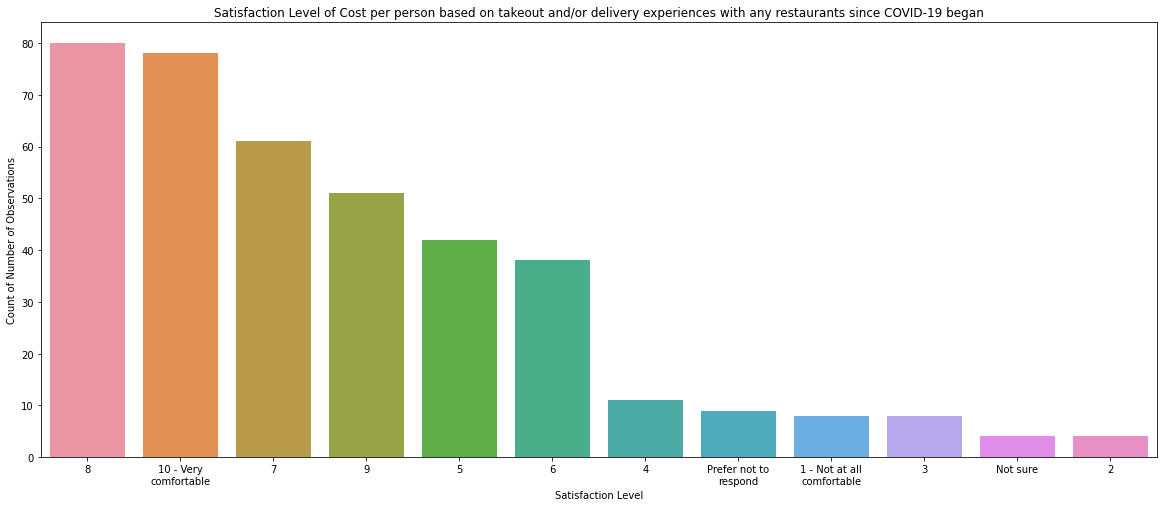

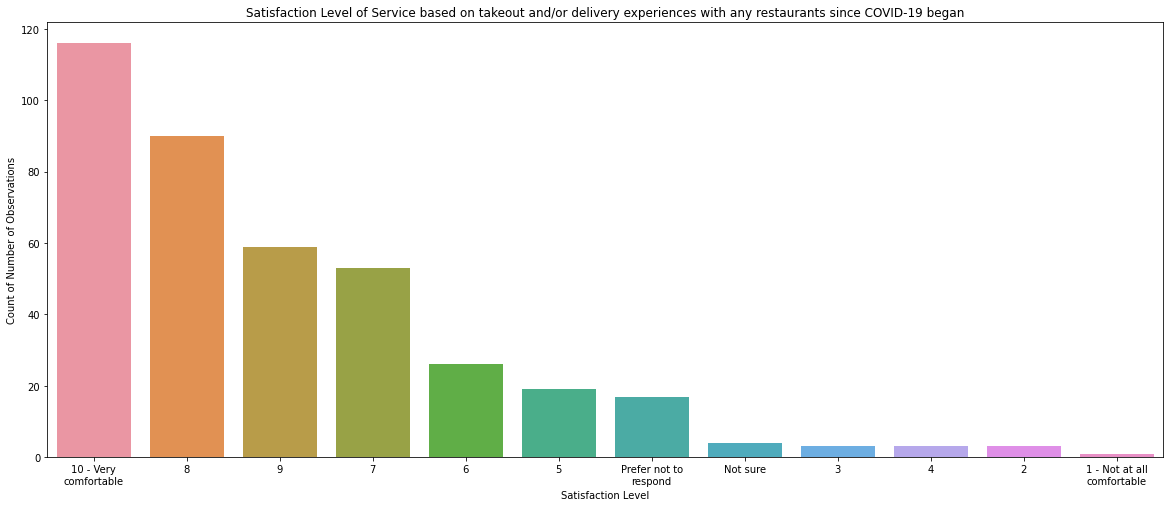

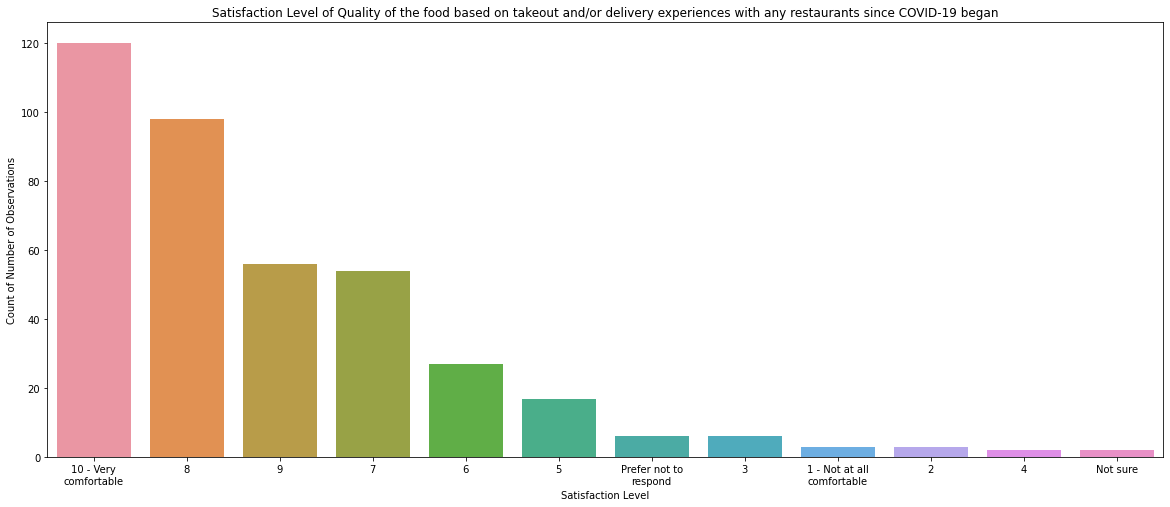

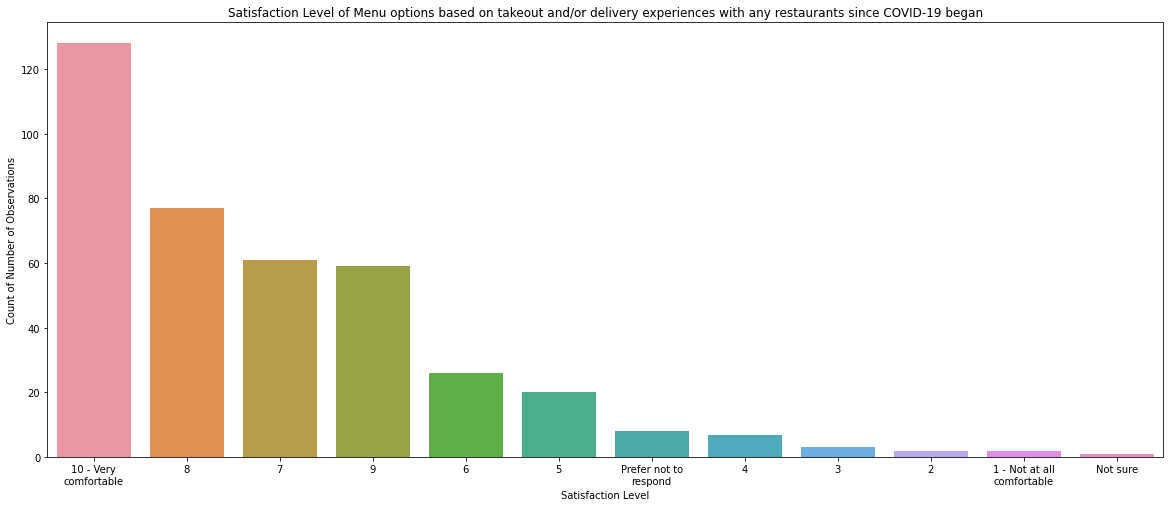

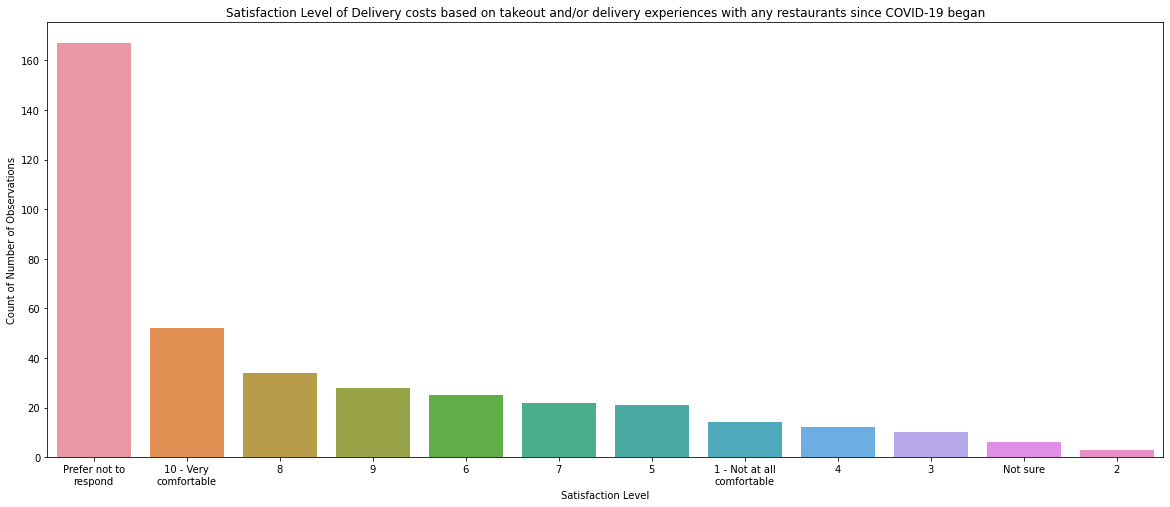

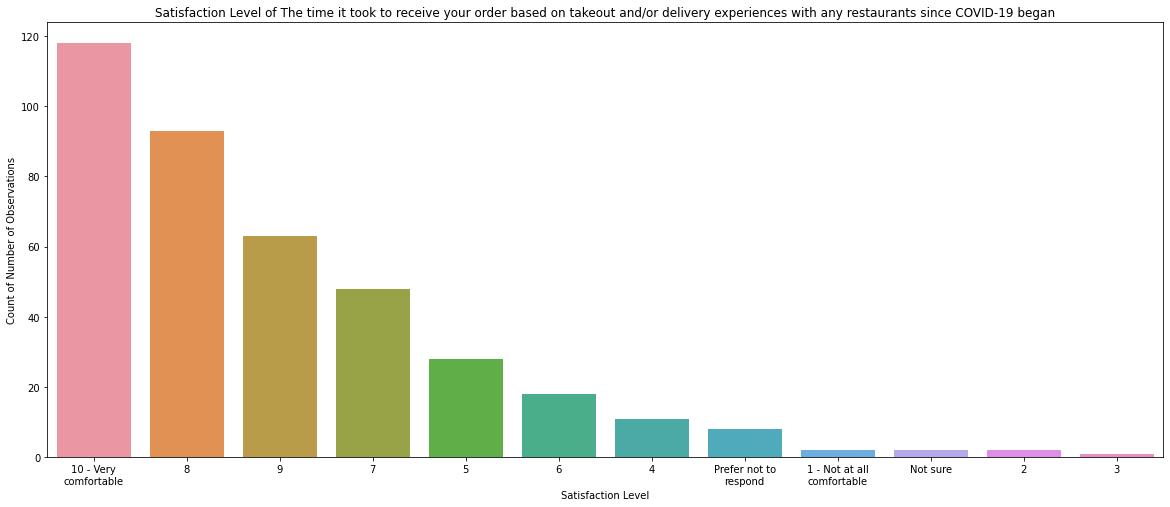

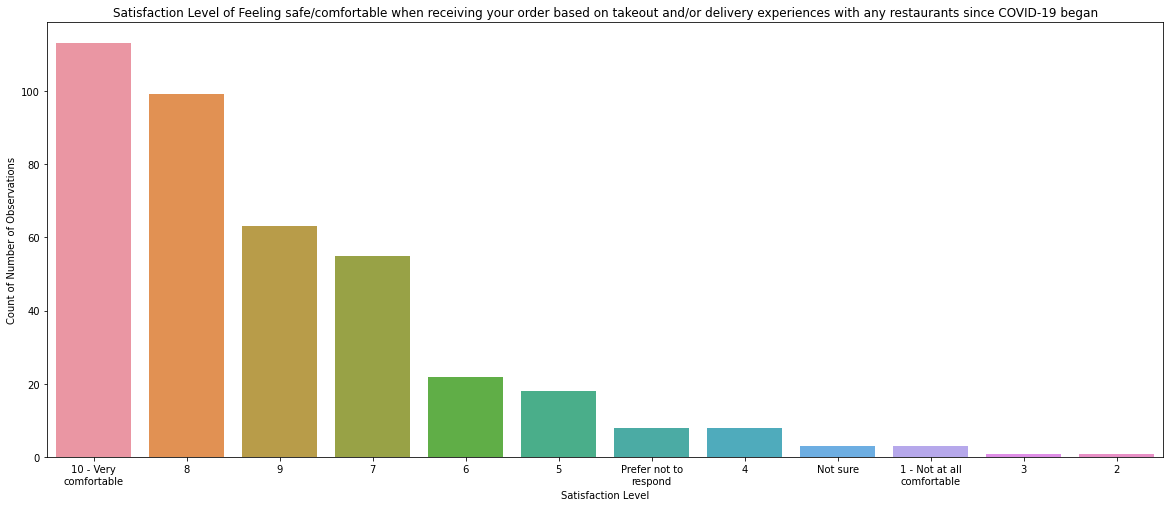

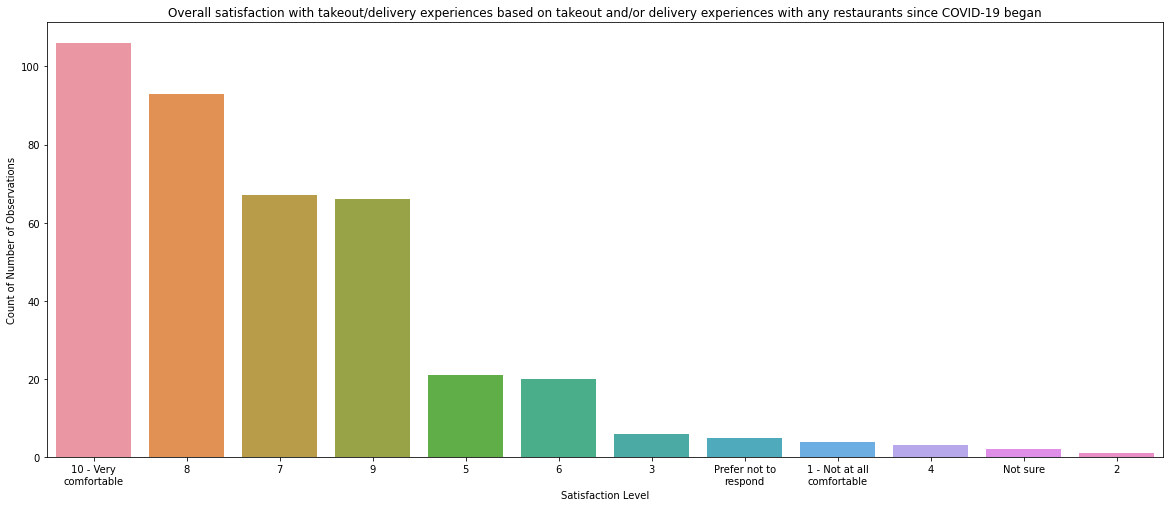

In [ ]:
satisfaction_ques = ['q8a',	'q8b',	'q8c',	'q8d',
                     'q8e', 'q8f', 'q8g', 'q8h']

for ques in satisfaction_ques:
  satisf_mapping = {
    '1': '1 - Not at all comfortable',
    '2': '2',
    '3': '3',
    '4': '4',
    '5': '5',
    '6': '6',
    '7': '7',
    '8': '8',
    '9': '9',
    '10': '10 - Very comfortable',
    '98': 'Not sure',
    '99': 'Prefer not to respond'
}
  satisf_mapping = {k: satisf_mapping[k] for k in np.array(pmg_covid_restaurant_copy[ques].value_counts().index) if k in satisf_mapping}
  pmg_covid_restaurant_copy[ques] = pmg_covid_restaurant_copy[ques].replace(satisf_mapping)
  plt.figure(figsize=(20,8))
  ax = sns.barplot(x = pmg_covid_restaurant_copy[ques].value_counts().drop(' ').index, y = pmg_covid_restaurant_copy[ques].value_counts().drop(' '))
  lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
  ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
  ax.set_title(mapping[ques])
  ax.set_xlabel('Satisfaction Level')
  ax.set_ylabel('Count of Number of Observations')
  plt.show()
  print("    ")

Prior to COVID-19, how important were the following to you when selecting a restaurant?

**1.**	Familiarity	

**2.**	Well-established			

**3.**	Trying something new		

**4.**	Service									

**5.**	The quality of the food				

**6.**	The taste of the food				

**7.**	The atmosphere						

**8.**	Music										

**9.**	Outdoor dining/patio					

**10.**	Wide range of menu options			

**11.**	Creativity of the menu

**12.**	Sourcing local products		

**13.**	Value for price paid			

**14.**	Offer takeout (in-person pickup)		

**15.**	Offer delivery				

**16.**	Online reviews							

**17.**	Recommendation from a family and/or friend

**18.**	Coupons and/or discounts available		

**19.**	Availability of parking							
				
**20.**	Focused on cleanliness and safety											




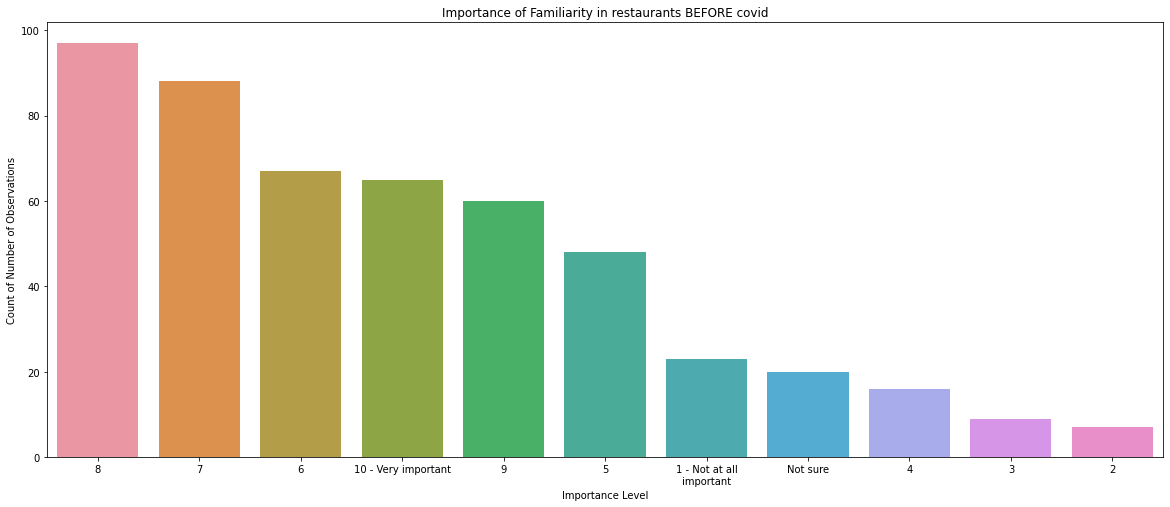

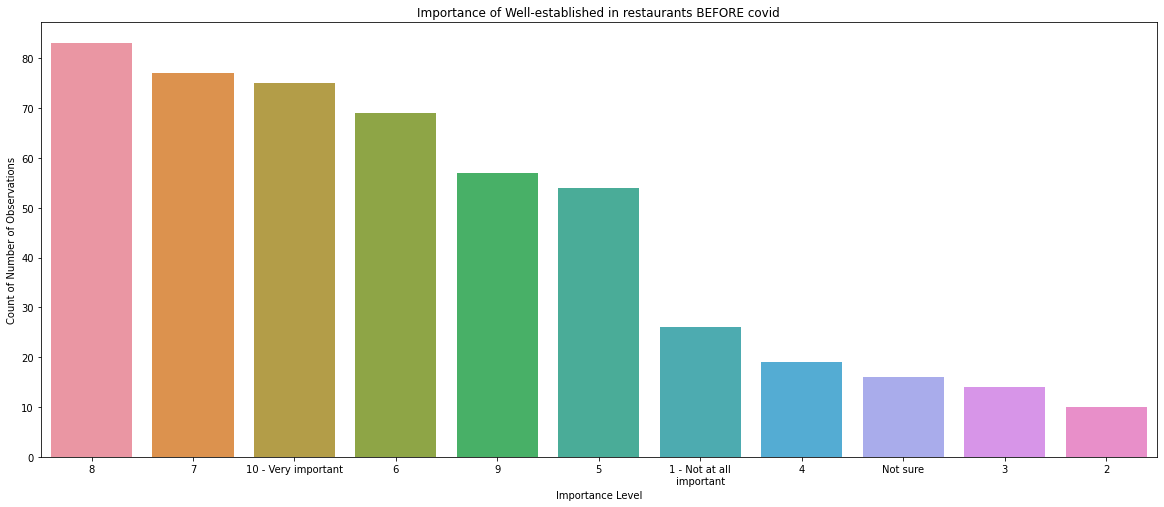

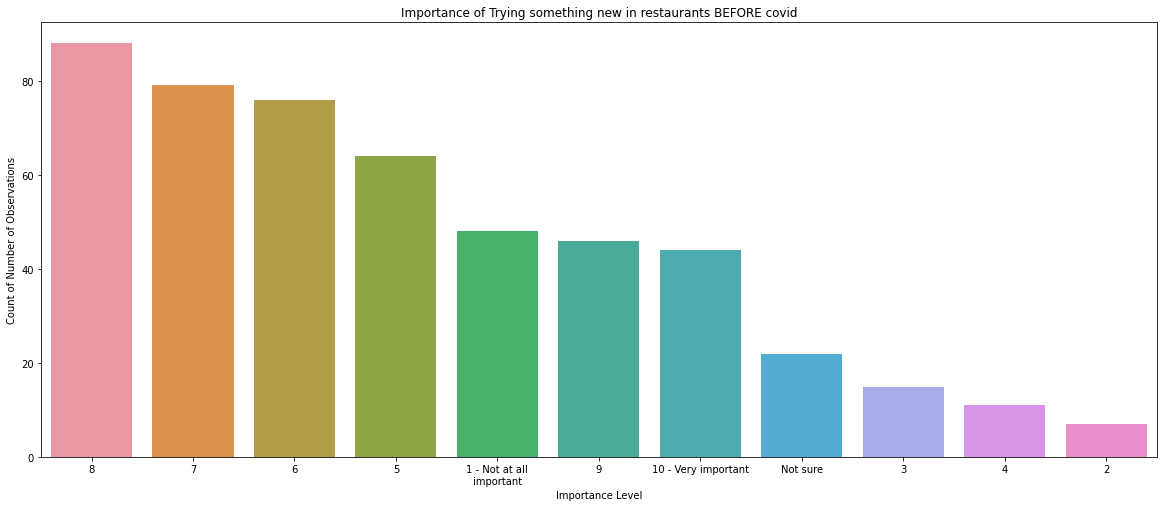

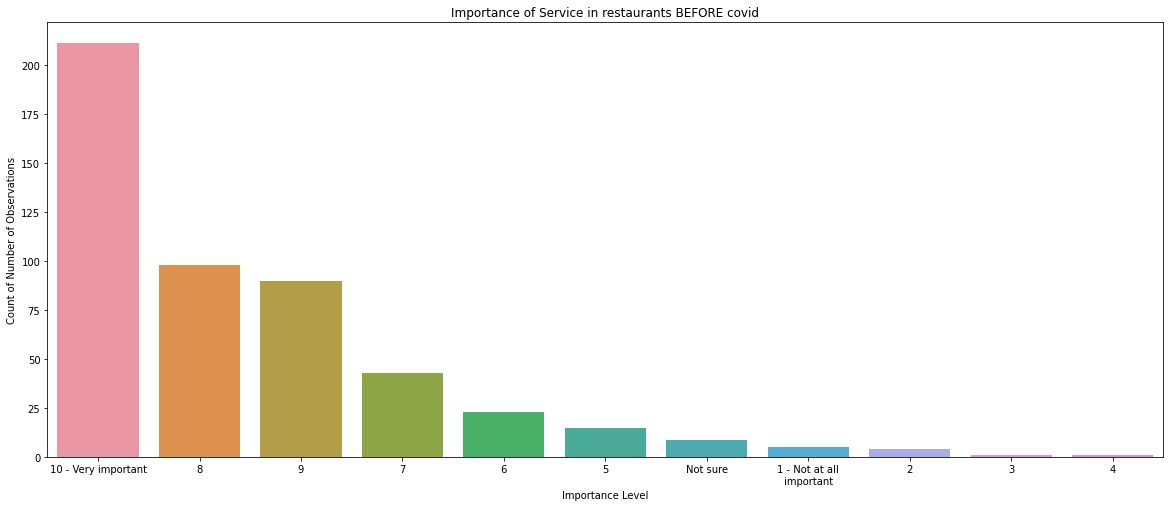

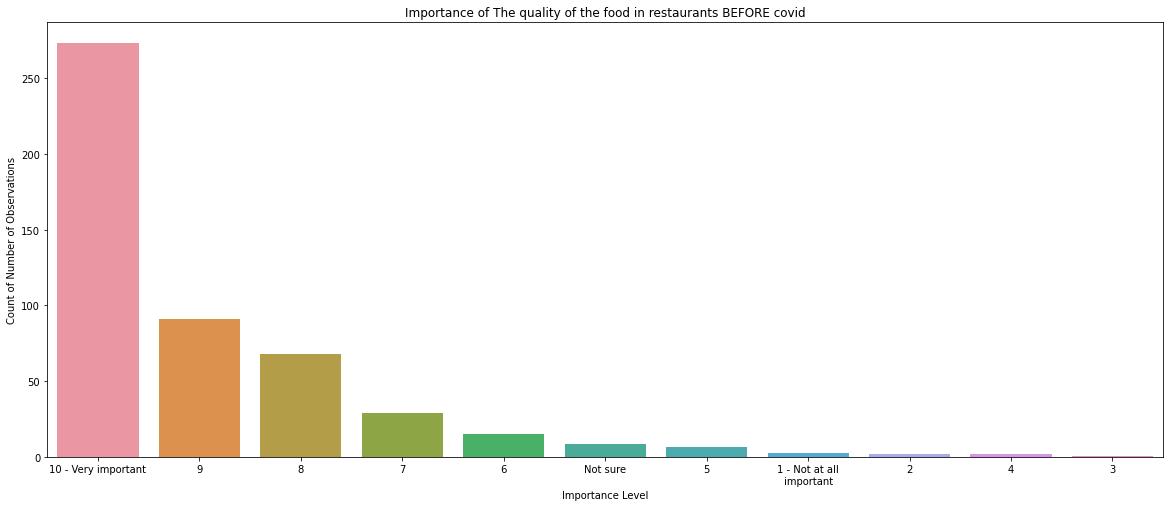

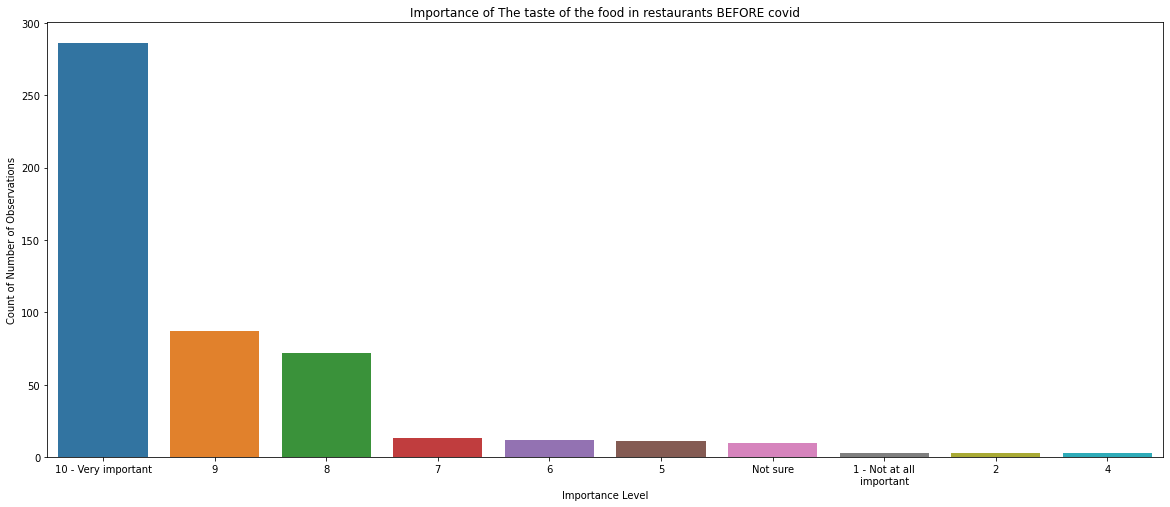

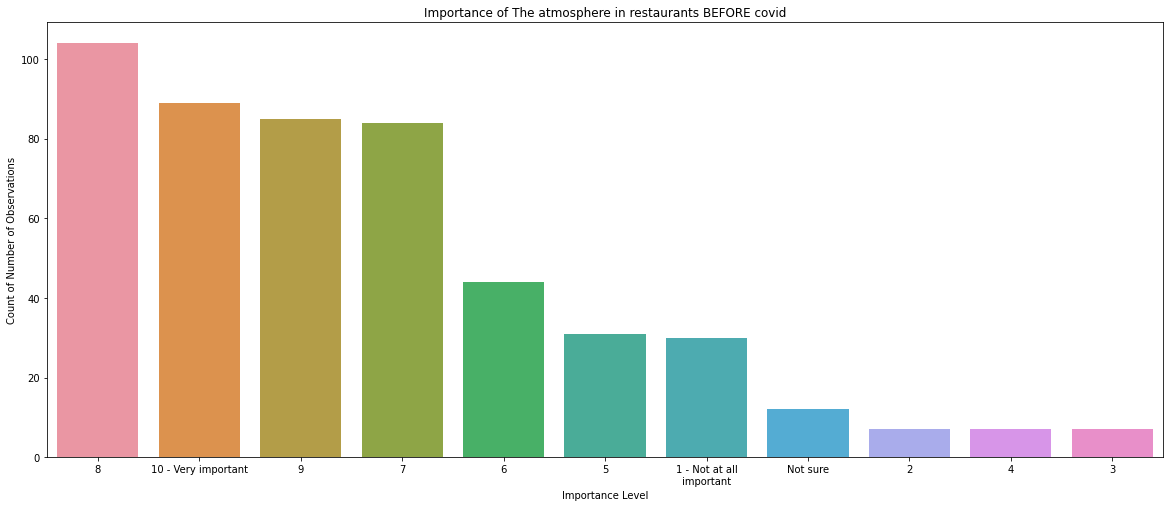

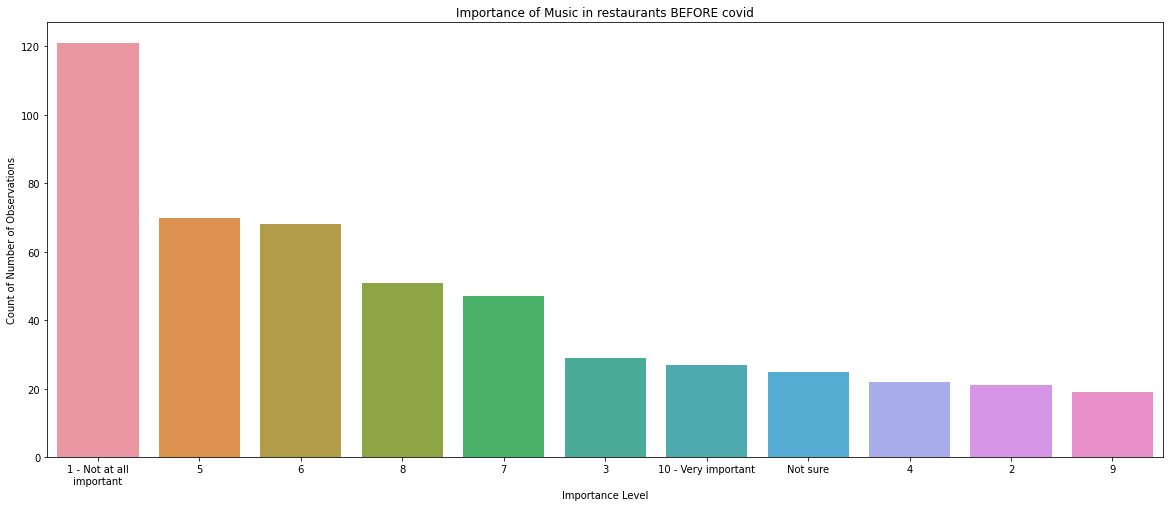

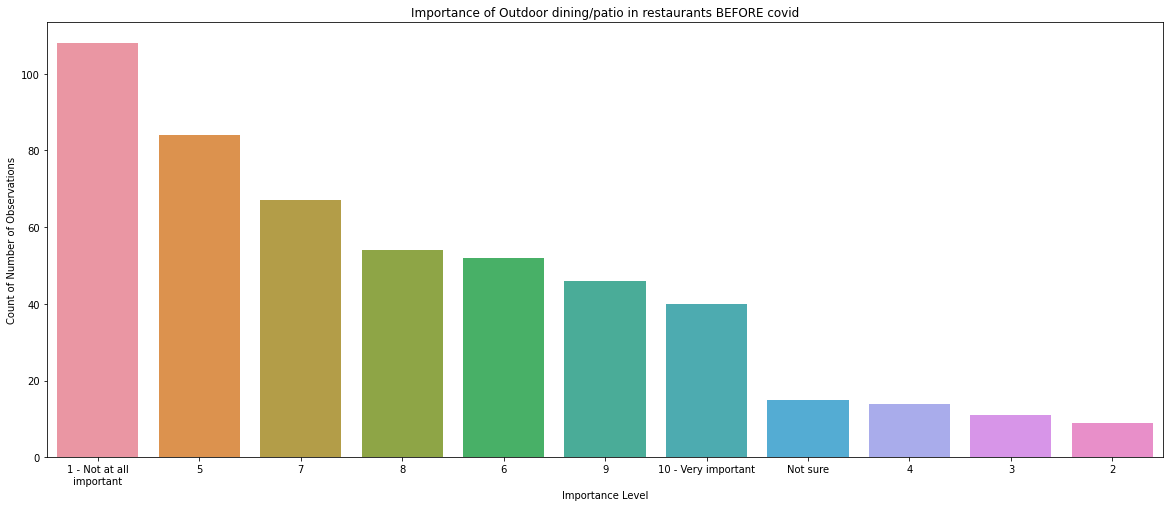

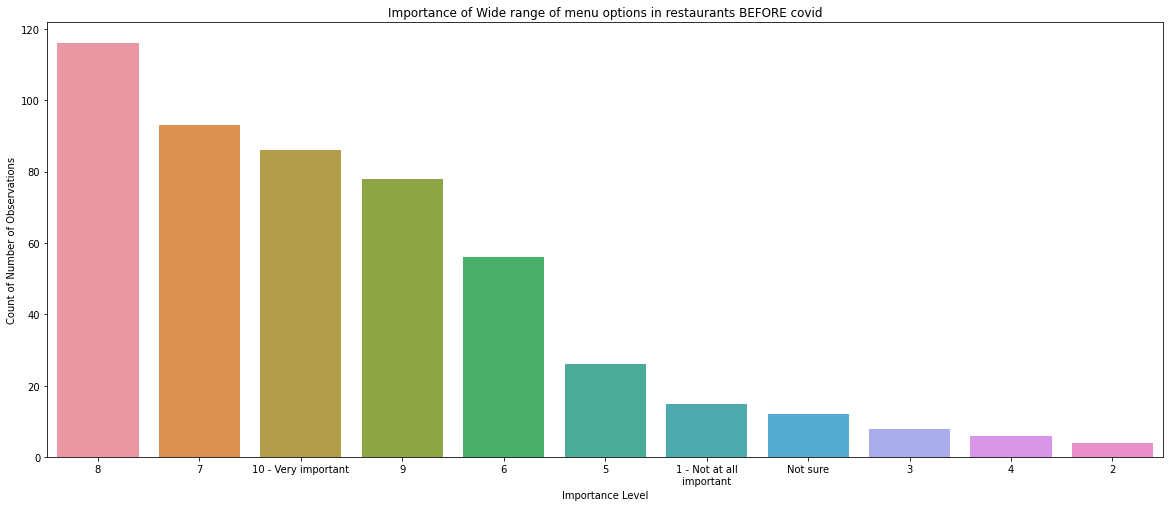

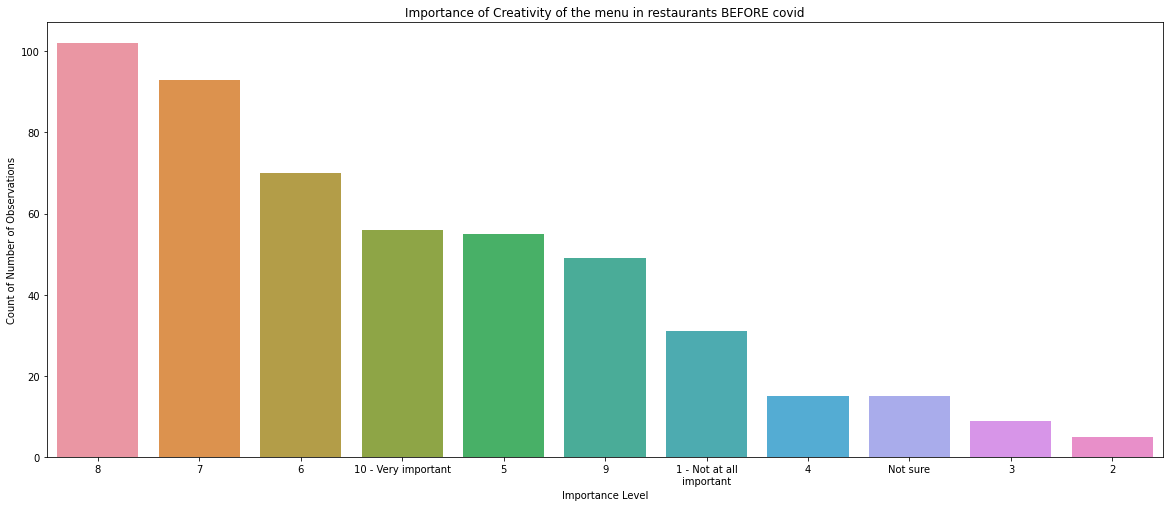

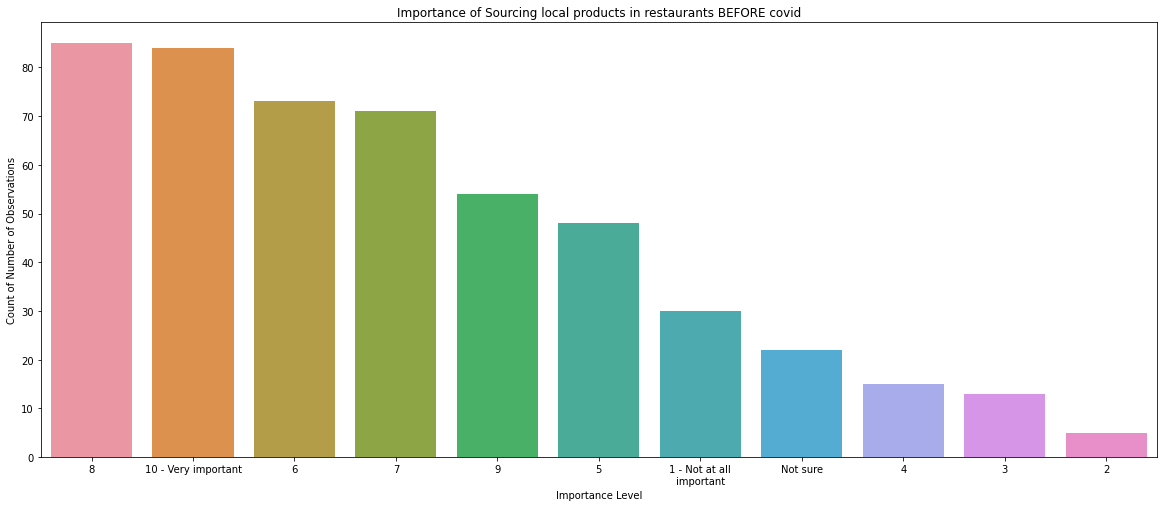

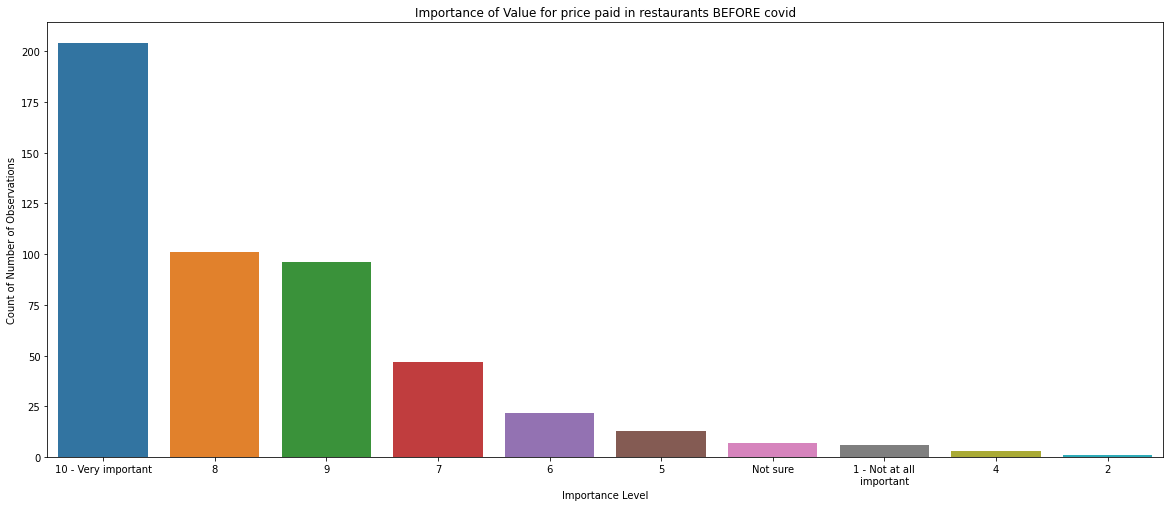

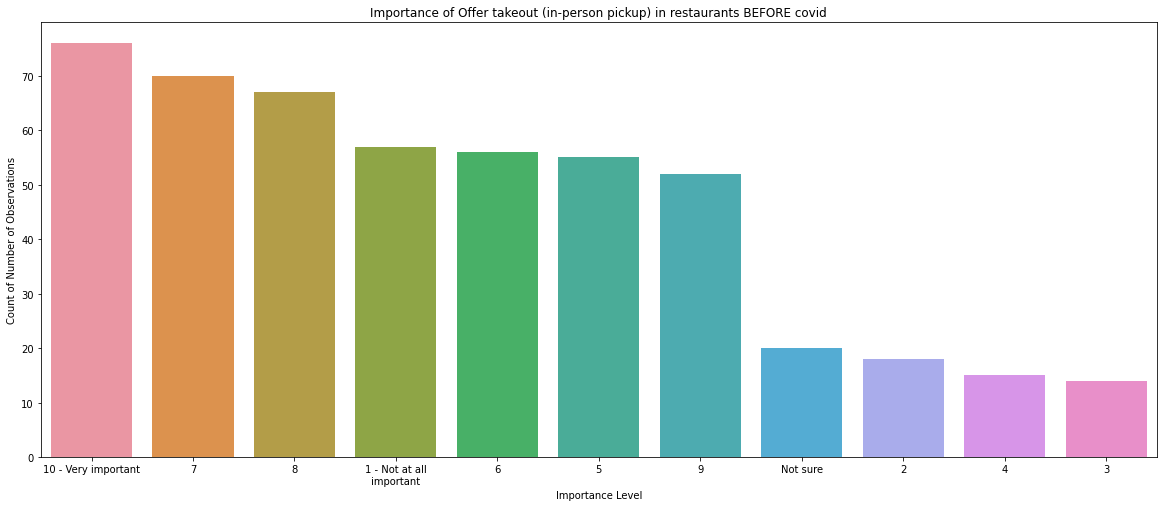

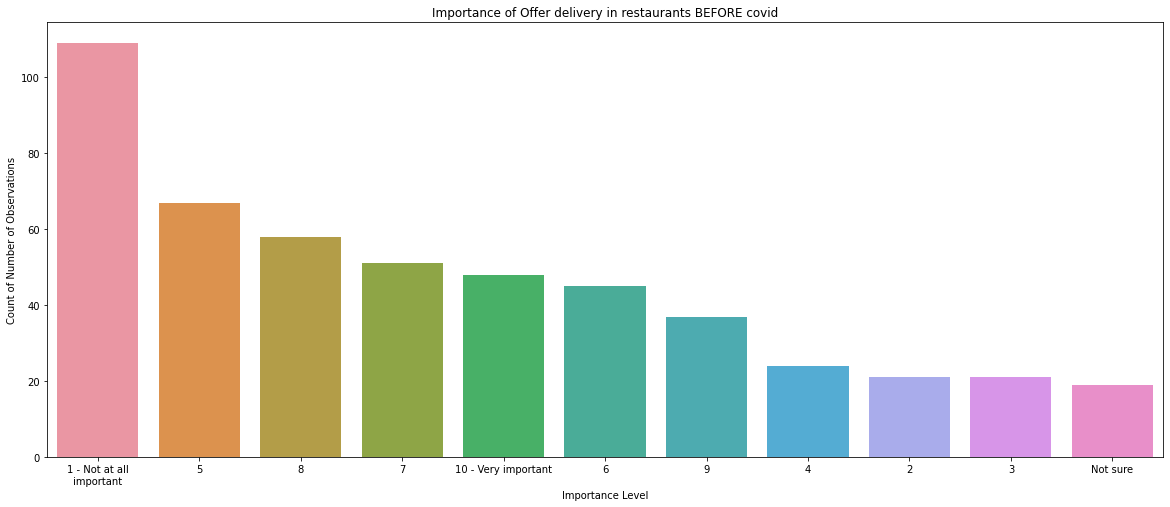

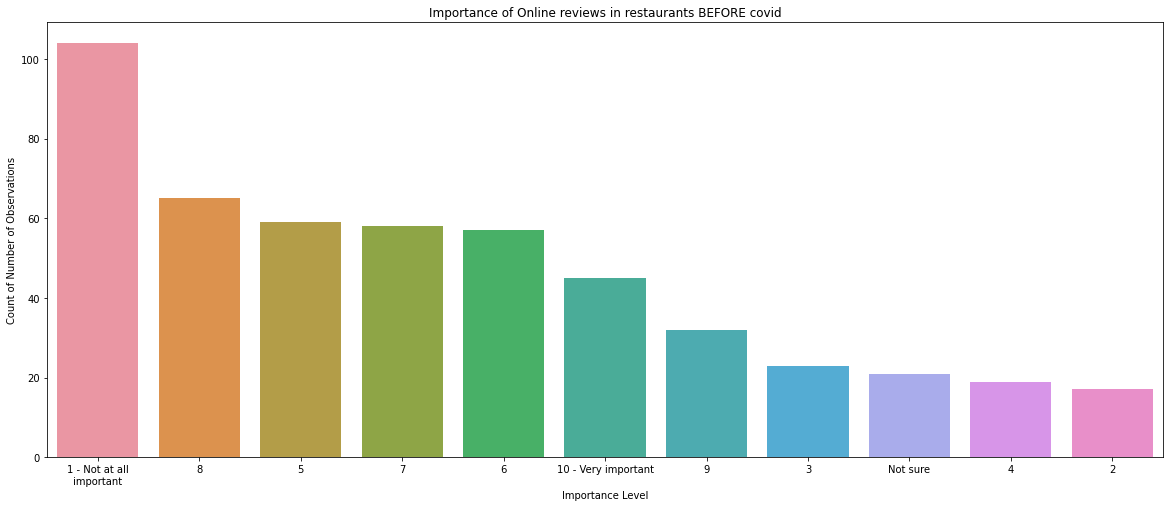

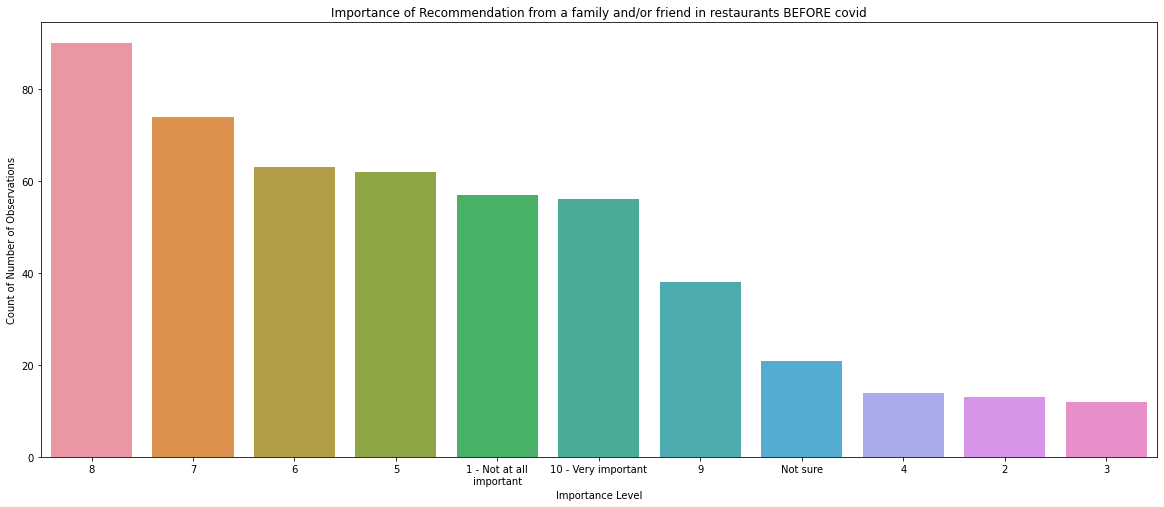

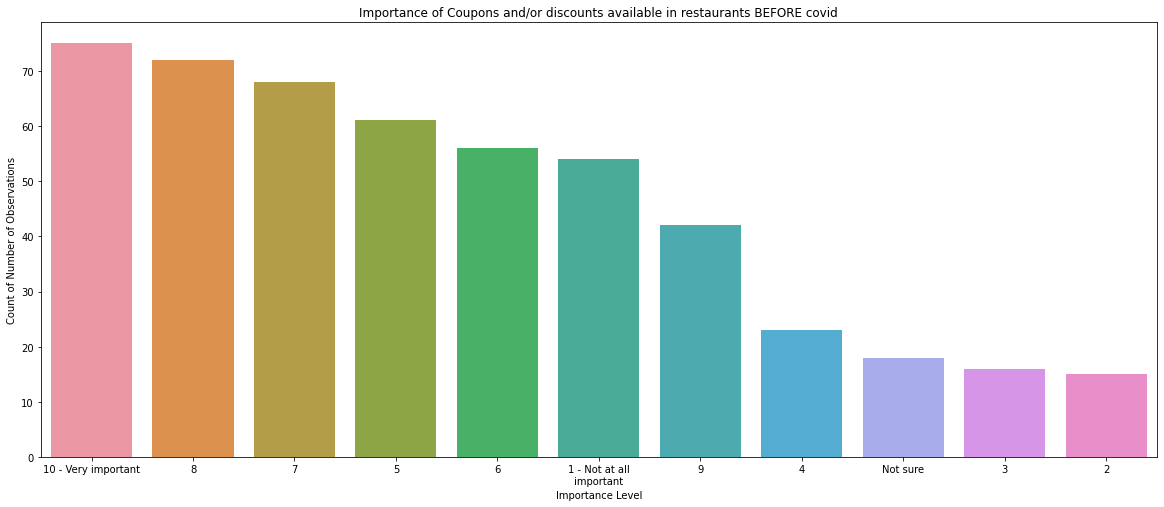

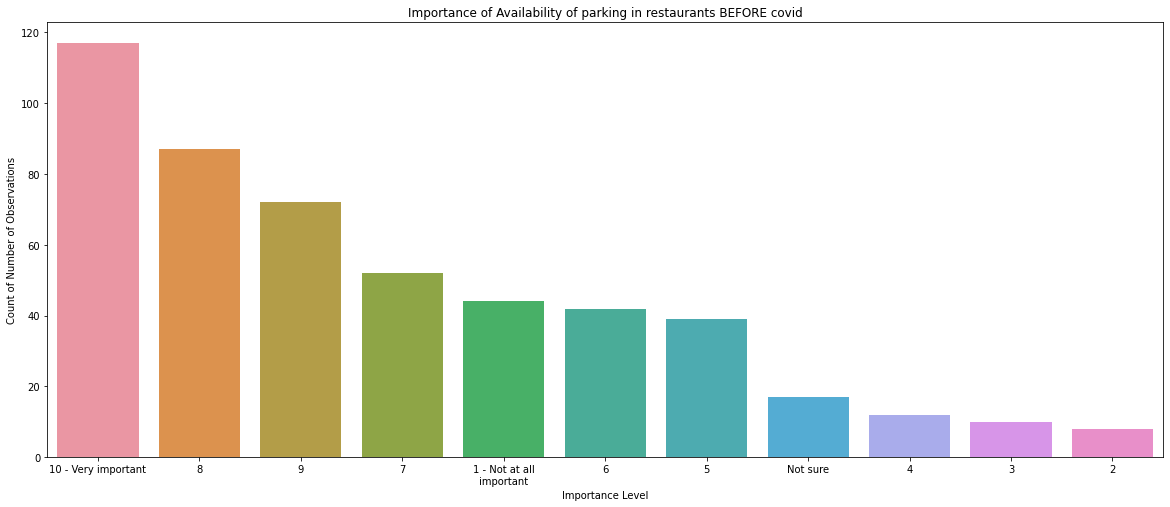

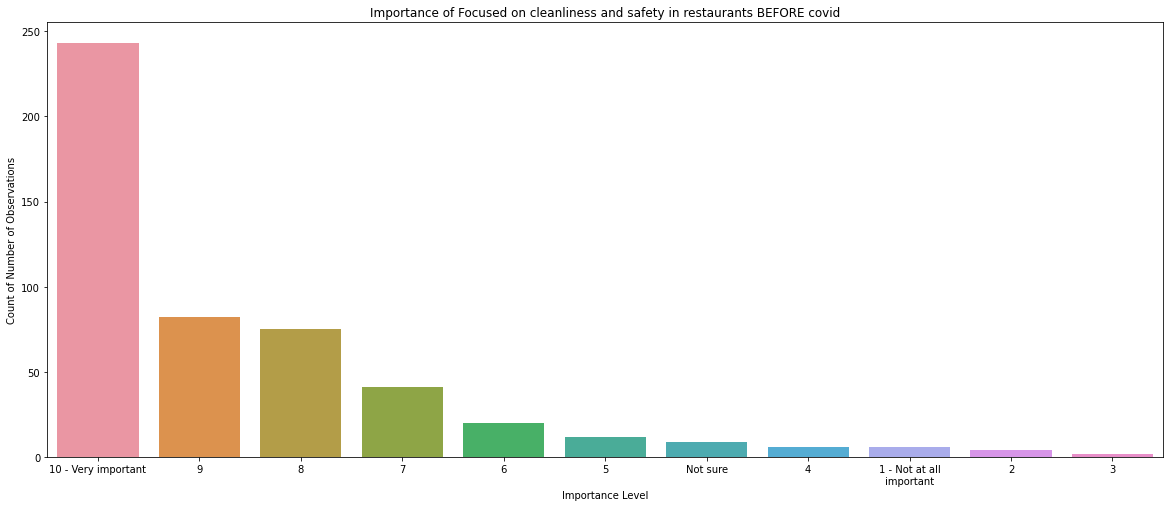

In [ ]:
importance_ques = ['q9a',	'q9b', 'q9c',	'q9d', 'q9e',
                   'q9f', 'q9g', 'q9h', 'q9i', 'q9j',
                   'q9k', 'q9l', 'q9m', 'q9n', 'q9o',
                   'q9p', 'q9q', 'q9r', 'q9s', 'q9t']

for ques in importance_ques:
  importance_mapping = {
    1: '1 - Not at all important',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: '7',
    8: '8',
    9: '9',
    10: '10 - Very important',
    98: 'Not sure',
}
  importance_mapping = {k: importance_mapping[k] for k in np.array(pmg_covid_restaurant_copy[ques].value_counts().index) if k in importance_mapping}
  pmg_covid_restaurant_copy[ques] = pmg_covid_restaurant_copy[ques].replace(importance_mapping)
  plt.figure(figsize=(20,8))
  ax = sns.barplot(x = pmg_covid_restaurant_copy[ques].value_counts().index, y = pmg_covid_restaurant_copy[ques].value_counts())
  lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
  ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
  ax.set_title(mapping[ques])
  ax.set_xlabel('Importance Level')
  ax.set_ylabel('Count of Number of Observations')
  plt.show()
  print("    ")

**Which of the following factors have INCREASED importance to you now than pre-COVID when selecting a restaurant, if any?**

**1.** Familiarity

**2.** Well-established

**3.** Trying something new

**4.** Service

**5.** The quality of the food

**6.** The taste of the food

**7.** The atmosphere

**8.** Music

**9.** Outdoor dining/patio

**10.** Wide range of menu options

**11.** Creativity of the menu

**12.** Sourcing local products

**13.** Value for price paid

**14.** Offer takeout (in-person pickup)

**15.** Offer delivery

**16.** Online reviews

**17.** Recommendation from a family and/or friend

**18.** Coupons and/or discounts available

**19.** Availability of parking

**20.** Focused on cleanliness and safety

**21.** Other

**22.** None of the above

**23.** Not sure


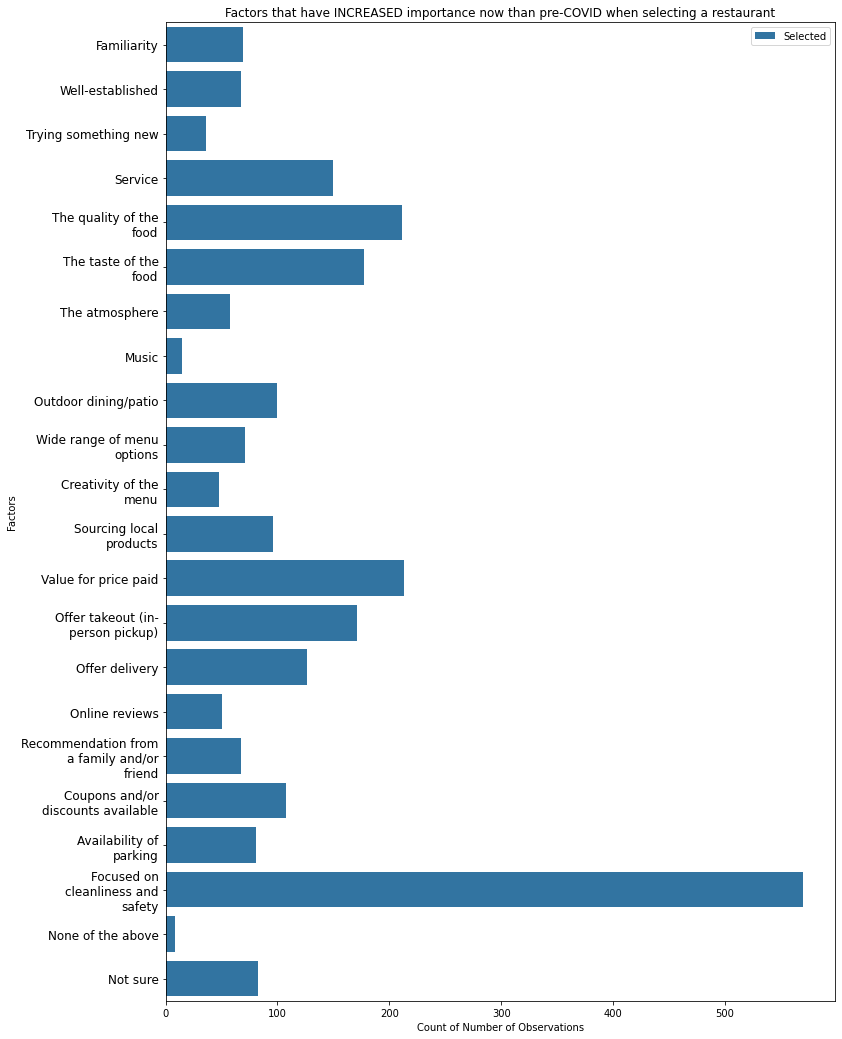

In [ ]:
factors = ['q10.1',	'q10.2',	'q10.3',	'q10.4', 'q10.5',
           'q10.6', 'q10.7', 'q10.8', 'q10.9', 'q10.10', 
           'q10.11', 'q10.12', 'q10.13', 'q10.14', 'q10.15', 
           'q10.16', 'q10.17', 'q10.18', 'q10.19', 'q10.20', 
           'q10.20', 'q10_None', 'q10_NS']

factors_mapping = {key: mapping[key] for key in factors}

df = pd.melt(pmg_covid_restaurant_copy[factors])
plt.figure(figsize=(12,18))
ax = sns.countplot(data = df.loc[df['value'] == '1'], y = 'variable', hue = 'value')
ax.set_yticklabels(('\n'.join(wrap(l, 20)) for l in factors_mapping.values()), rotation='horizontal', fontsize=12)
ax.legend(loc='upper right', labels=['Selected'])
ax.set_title('Factors that have INCREASED importance now than pre-COVID when selecting a restaurant')
ax.set_ylabel('Factors')
ax.set_xlabel('Count of Number of Observations')
plt.show()
print("    ")

**How much do you typically spend per visit, per person, on average when dining at a restaurant?**

In [ ]:
# The MINIMUM average money spent PER PERSON when dining at a restaurant
minimum = pd.to_numeric(pmg_covid_restaurant_copy['q11'], errors='coerce').min()
print("MINIMUM average money spent PER PERSON when dining at a restaurant is $" + str(float(minimum)))

# The MAXIMUM average money spent PER PERSON when dining at a restaurant
maximum = pd.to_numeric(pmg_covid_restaurant_copy['q11'], errors='coerce').max()
print("MAXIMUM average money spent PER PERSON when dining at a restaurant is $" + str(float(maximum)))

# The RANGE of the average money spent PER PERSON when dining at a restaurant
print("Average money spent PER PERSON when dining at a restaurant has a RANGE of $" + str(float(maximum) - float(minimum)) + " between MAXIMUM and MINIMUM averages")

# Mean Average Money spent PER PERSON 
avg = pd.to_numeric(pmg_covid_restaurant_copy['q11'], errors='coerce').mean()
print("Mean Average money spent PER PERSON when dining at a restaurant is $" + str(float(avg)))

MINIMUM average money spent PER PERSON when dining at a restaurant is $5.0
MAXIMUM average money spent PER PERSON when dining at a restaurant is $200.0
Average money spent PER PERSON when dining at a restaurant has a RANGE of $195.0 between MAXIMUM and MINIMUM averages
Mean Average money spent PER PERSON when dining at a restaurant is $28.636090047393367


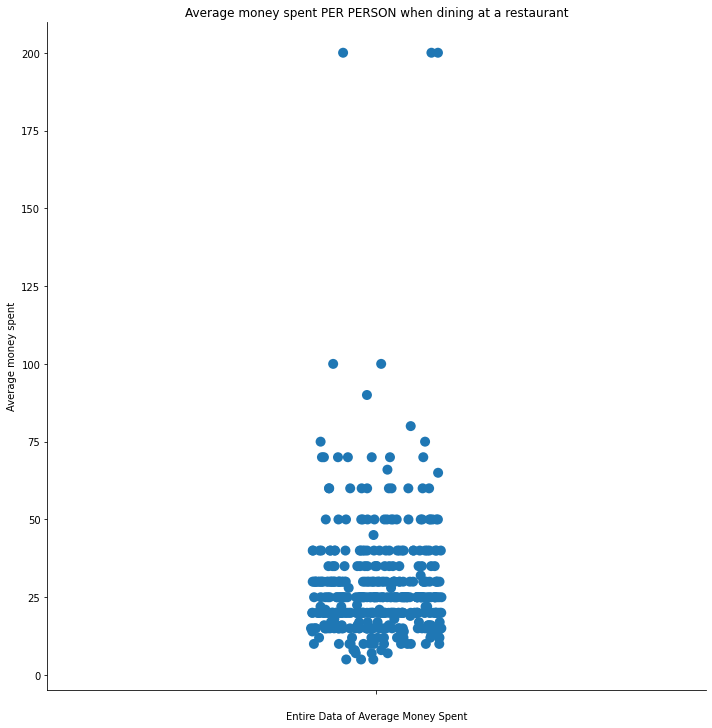

In [ ]:
data = pd.concat([pd.Series([" "] * len(pmg_covid_restaurant_copy['q11'])), pd.to_numeric(pmg_covid_restaurant_copy['q11'], errors='coerce')], axis=1)
data.rename(columns = {0: "Entire Data of Average Money Spent"}, inplace = True)
ax = sns.catplot(x = 'Entire Data of Average Money Spent', y = "q11", s = 10, jitter = True, data = data, height=10)
ax.set(ylabel = "Average money spent", title = "Average money spent PER PERSON when dining at a restaurant")
plt.show()

**Which of the following ways would you prefer restaurants provide additional information to guests regarding health and safety protocols?**

**1.** Posters/information signage at the restaurant

**2.** QR Code printed on the menu

**3.** Social media platforms

**4.** Email 

**5.** Pamphlets delivered to your home

**6.** Information listed on the restaurant’s website

**7.** Other

**8.** Do not need to see additional protocols/information

**9.** Not sure


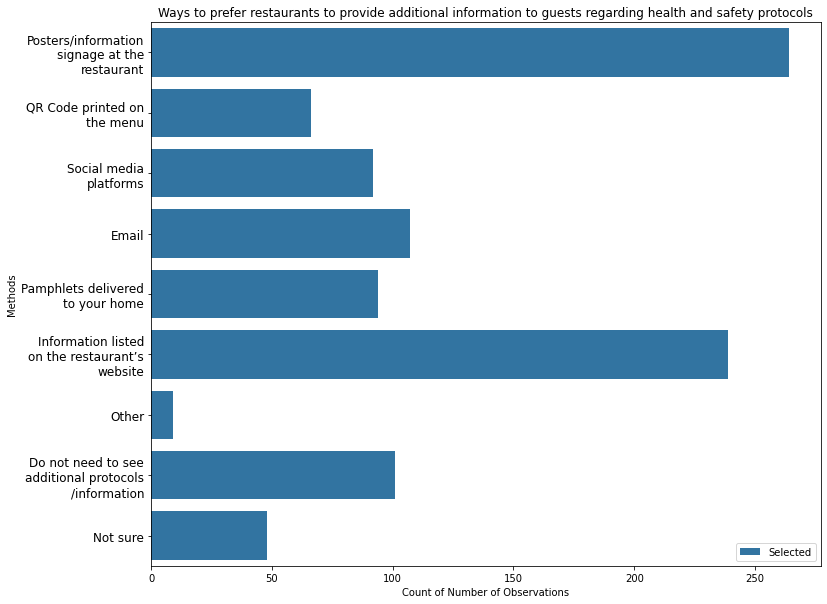

In [ ]:
ways_info = ['q12.1',	'q12.2',	'q12.3',	'q12.4', 'q12.5',
             'q12.6', 'q12.7', 'q12_None', 'q12_NS']

ways_info_mapping = {key: mapping[key] for key in ways_info}

df = pd.melt(pmg_covid_restaurant_copy[ways_info])
plt.figure(figsize=(12,10))
ax = sns.countplot(data = df.loc[df['value'] == '1'], y = 'variable', hue = 'value')
ax.set_yticklabels(('\n'.join(wrap(l, 20)) for l in ways_info_mapping.values()), rotation='horizontal', fontsize=12)
ax.legend(loc='lower right', labels=['Selected'])
ax.set_title('Ways to prefer restaurants to provide additional information to guests regarding health and safety protocols')
ax.set_ylabel('Methods')
ax.set_xlabel('Count of Number of Observations')
plt.show()
print("    ")

**Which of the following best describes your intended actions in terms of returning to “normal” as COVID regulations are lifted?**

**0.** Not applicable – Have not changed behaviours from pre-COVID

**1.** Have already returned to “normal”

**2.** Return to what is “normal” for you immediately

**3.** Wait until others have returned to “normal”

**4.** Wait until family, friends, and/or colleagues have started returning to “normal”

**5.** Wait until family, friends, and/or colleagues have returned to “normal” for a period of time

**6.** Hold off as long as possible; reluctant to return to “normal”

**7.** I do not intend to return to my old “normal”

**8.** Not sure

**9.** Prefer not to respond


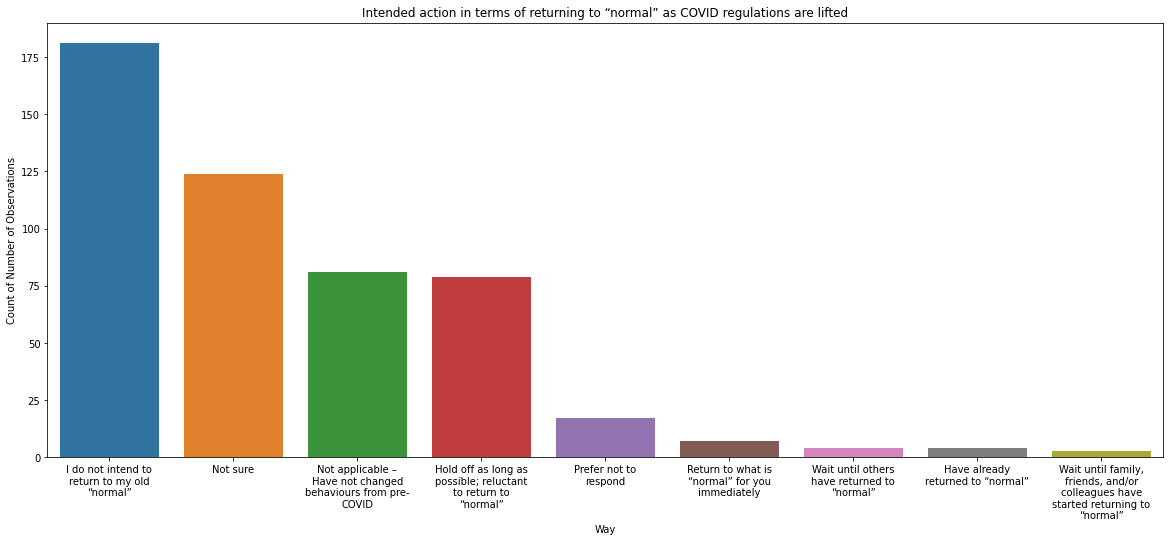

In [ ]:
normal_mapping = {
    1: 'Have already returned to “normal”',
    2: 'Return to what is “normal” for you immediately',
    3: 'Wait until others have returned to “normal”',
    4: 'Wait until family, friends, and/or colleagues have started returning to “normal”',
    5: 'Wait until family, friends, and/or colleagues have returned to “normal” for a period of time',
    6: 'Hold off as long as possible; reluctant to return to “normal”',
    7: 'I do not intend to return to my old “normal”',
    75: 'Not applicable – Have not changed behaviours from pre-COVID',
    98: 'Not sure',
    99: 'Prefer not to respond'
}
normal_mapping = {k: normal_mapping[k] for k in np.array(pmg_covid_restaurant_copy['q14'].value_counts().index) if k in normal_mapping}
pmg_covid_restaurant_copy['q14'] = pmg_covid_restaurant_copy['q14'].replace(normal_mapping)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pmg_covid_restaurant_copy['q14'].value_counts().index, y = pmg_covid_restaurant_copy['q14'].value_counts())
lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
ax.set_title(mapping['q14'])
ax.set_xlabel('Way')
ax.set_ylabel('Count of Number of Observations')
plt.show()
print("    ")

**For each of the following, please indicate whether Option A or Option B best describes you.**

**1.**
*   **A:** You can’t wait to get back to normal
*   **B:** You are embracing the changes that are happening		


**2.**
*   **A:** You would prefer to prepare your own meals (i.e. cooking at home)
*   **B:** You would prefer to have your meals prepared for you (i.e. pre-packaged, take-out/delivery, restaurant, etc.)
	

**3.**	
*   **A:** You prefer to dine in at a restaurant
*   **B:** You prefer to order take out or delivery				


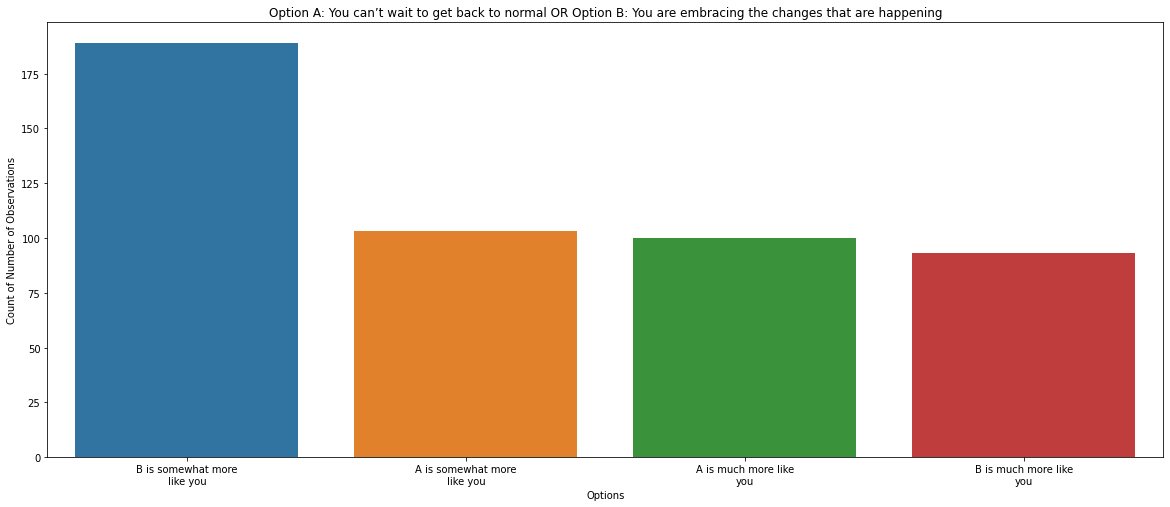

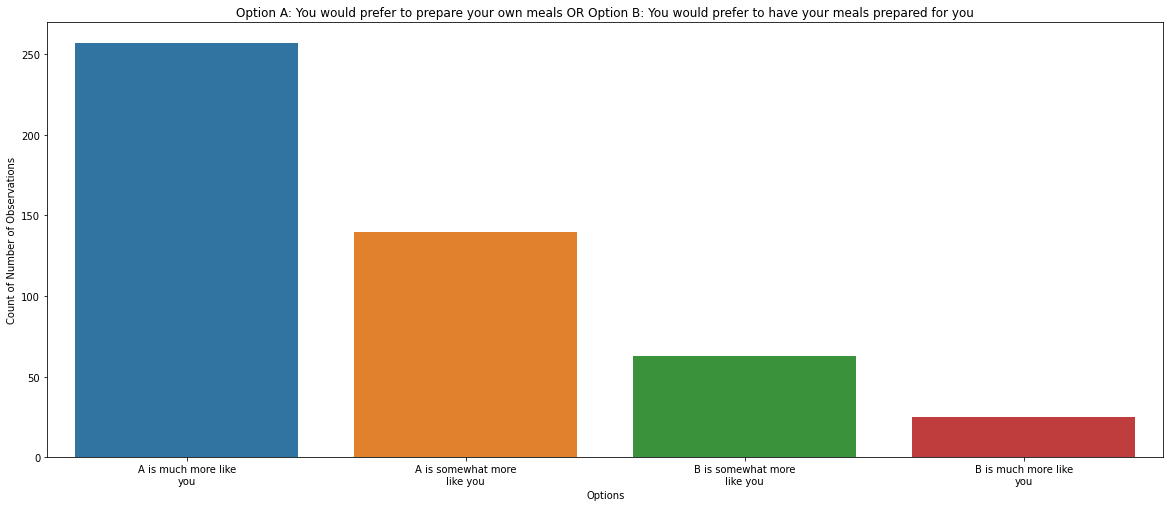

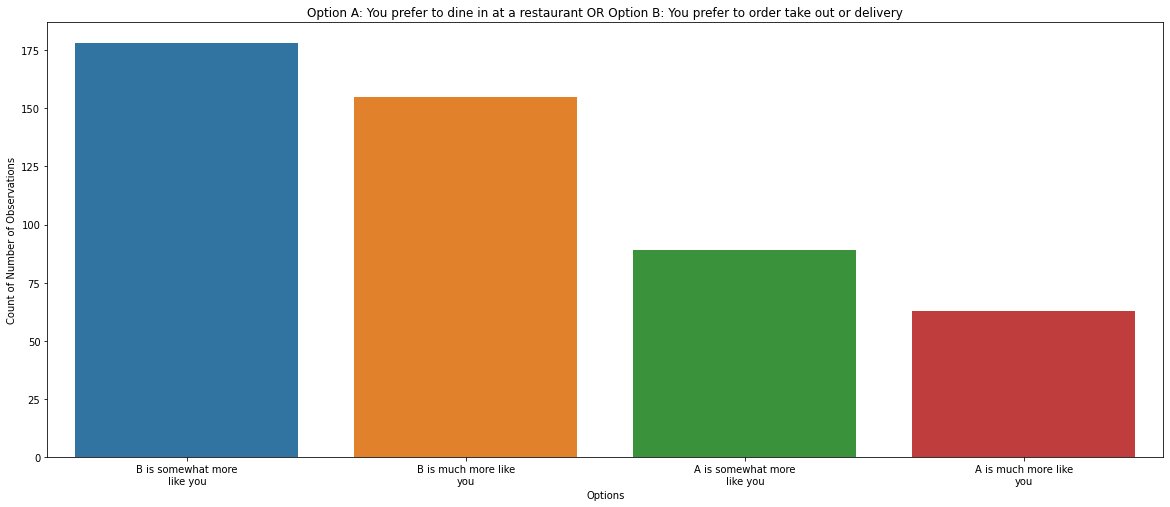

In [ ]:
A_or_B_ques = ['q15a',	'q15b', 'q15c']

for ques in A_or_B_ques:
  A_or_B_mapping = {
    '1': 'A is much more like you',
    '2': 'A is somewhat more like you',
    '3': 'B is somewhat more like you',
    '4': 'B is much more like you',
}
  A_or_B_mapping = {k: A_or_B_mapping[k] for k in np.array(pmg_covid_restaurant_copy[ques].value_counts().index) if k in A_or_B_mapping}
  pmg_covid_restaurant_copy[ques] = pmg_covid_restaurant_copy[ques].replace(A_or_B_mapping)
  plt.figure(figsize=(20,8))
  ax = sns.barplot(x = pmg_covid_restaurant_copy[ques].value_counts().drop(' ').index, y = pmg_covid_restaurant_copy[ques].value_counts().drop(' '))
  lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
  ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
  ax.set_title(mapping[ques])
  ax.set_xlabel('Options')
  ax.set_ylabel('Count of Number of Observations')
  plt.show()
  print("    ")

**Which of the following websites do you access once a week or more?**

**1.** Facebook

**2.** Instagram

**3.** Twitter

**4.** Pinterest

**5.** LinkedIn

**6.** Snapchat

**7.** YouTube

**8.** Tik Tok

**9.** Google

**10.** None – do not access any of the above weekly

**11.** Prefer not to respond


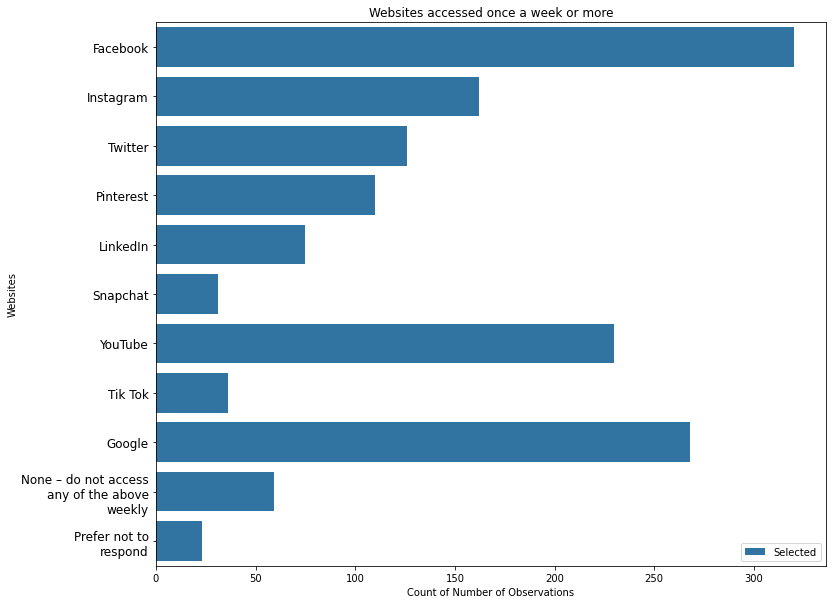

In [ ]:
websites_info = ['q16.1',	'q16.2',	'q16.3',	'q16.4', 'q16.5',
                 'q16.6', 'q16.7', 'q16.8', 'q16.9', 'q16_None', 'q16_REF']

websites_info_mapping = {key: mapping[key] for key in websites_info}

df = pd.melt(pmg_covid_restaurant[websites_info])
plt.figure(figsize=(12,10))
ax = sns.countplot(data = df.loc[df['value'] == '1'], y = 'variable', hue = 'value')
ax.set_yticks(range(len(websites_info_mapping)))
ax.set_yticklabels(('\n'.join(wrap(l, 20)) for l in websites_info_mapping.values()), rotation='horizontal', fontsize=12)
ax.legend(loc='lower right', labels=['Selected'])
ax.set_title('Websites accessed once a week or more')
ax.set_ylabel('Websites')
ax.set_xlabel('Count of Number of Observations')
plt.show()
print("    ")

**What is Your Age (Based on Year Born)?**

In [ ]:
 pmg_covid_restaurant_copy['Age'] = (2021 - pd.to_numeric(pmg_covid_restaurant_copy['YOB'], errors='coerce'))

In [ ]:
# The MINIMUM Age (YOUNGEST) 
minimum = (2021 - pd.to_numeric(pmg_covid_restaurant_copy['YOB'], errors='coerce')).min()
print("Youngest age is " + str(float(minimum)) + " years old")

# The MAXIMUM Age (OLDEST) 
maximum = (2021 - pd.to_numeric(pmg_covid_restaurant_copy['YOB'], errors='coerce')).max()
print("Oldest age is " + str(float(maximum)) + " years old")

# The RANGE from the YOUNGEST to OLDEST Age 
print("The RANGE of Ages is " + str(float(maximum) - float(minimum)) + " years between MAXIMUM and MINIMUM Ages")

# The Average Age
avg = (2021 - pd.to_numeric(pmg_covid_restaurant_copy['YOB'], errors='coerce')).mean()
print("Average age is " + str(float(avg)) + " years old")

Youngest age is 19.0 years old
Oldest age is 93.0 years old
The RANGE of Ages is 74.0 years between MAXIMUM and MINIMUM Ages
Average age is 55.67180616740088 years old


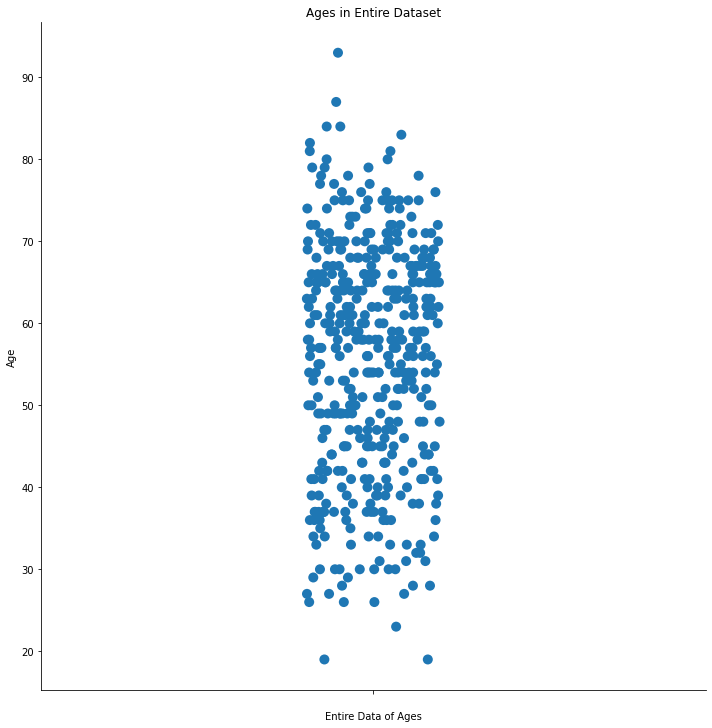

In [ ]:
data = pd.concat([pd.Series([" "] * len(pmg_covid_restaurant_copy['Age'])), pmg_covid_restaurant_copy['Age']], axis=1)
data.rename(columns = {0: "Entire Data of Ages"}, inplace = True)
ax = sns.catplot(x = 'Entire Data of Ages', y = "Age", s = 10, jitter = True, data = data, height=10)
ax.set(ylabel = "Age", title = "Ages in Entire Dataset")
plt.show()

**Which of the following best describes your relationship status?**

**1.** Married

**2.** Co-habitation/common-law

**3.** Single, never married

**4.** Divorced / Separated

**5.** Widowed

**6.** Prefer not to respond


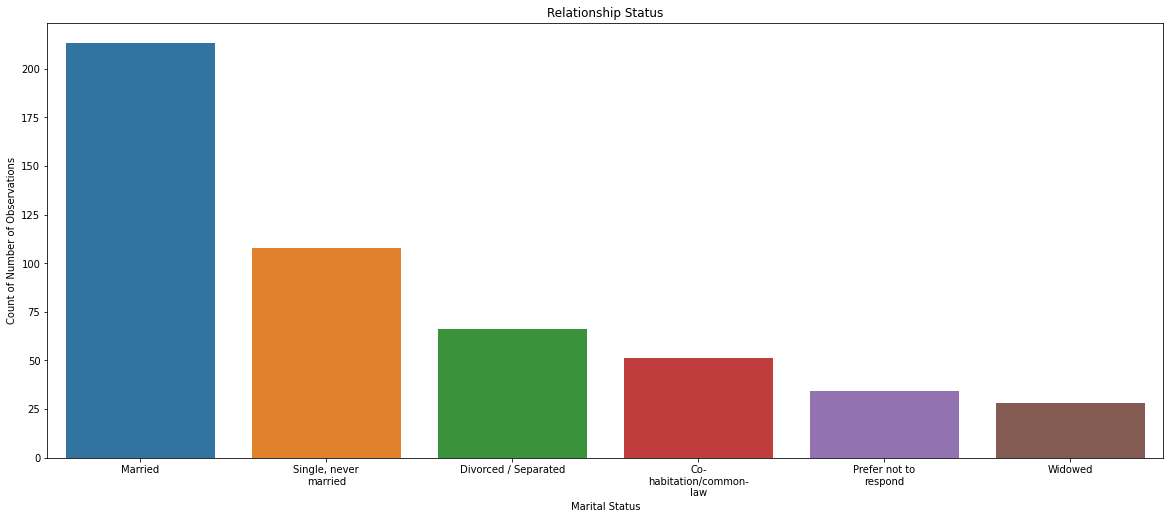

In [ ]:
marital_status_mapping = {
    1: 'Married',
    2: 'Co-habitation/common-law',
    3: 'Single, never married',
    4: 'Divorced / Separated',
    5: 'Widowed',
    99: 'Prefer not to respond'
}
marital_status_mapping = {k: marital_status_mapping[k] for k in np.array(pmg_covid_restaurant_copy['MARITAL'].value_counts().index) if k in marital_status_mapping}
pmg_covid_restaurant_copy['MARITAL'] = pmg_covid_restaurant_copy['MARITAL'].replace(marital_status_mapping)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pmg_covid_restaurant_copy['MARITAL'].value_counts().index, y = pmg_covid_restaurant_copy['MARITAL'].value_counts())
lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
ax.set_title(mapping['MARITAL'])
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count of Number of Observations')
plt.show()
print("    ")

**Do you have children under the age of 18 living at home?**

**1.** Yes 

**2.** No 

**3.** Prefer not to respond 

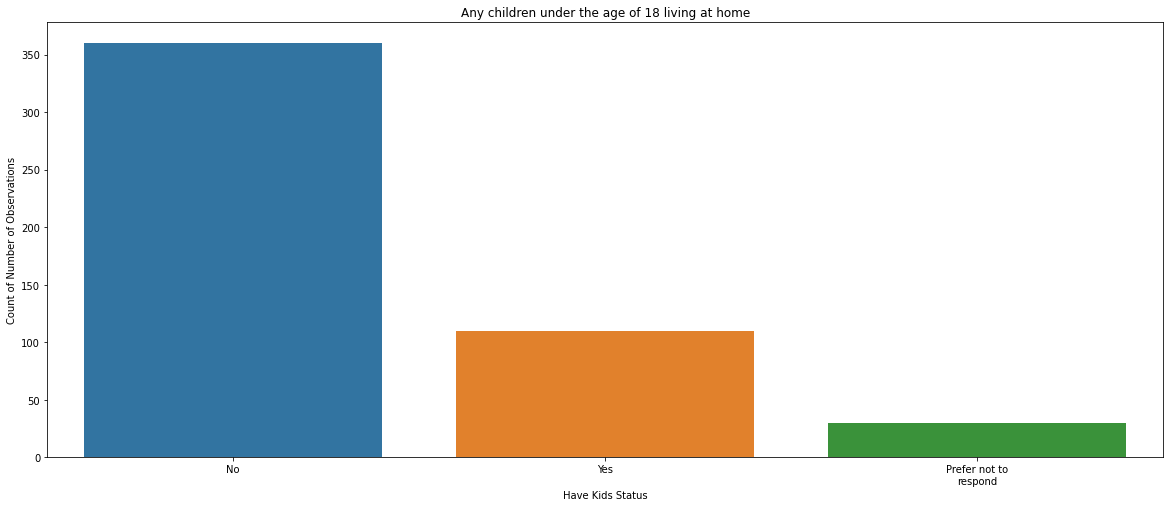

In [ ]:
kids_status_mapping = {
    1: 'Yes',
    2: 'No',
    99: 'Prefer not to respond'
}
kids_status_mapping = {k: kids_status_mapping[k] for k in np.array(pmg_covid_restaurant_copy['KIDS'].value_counts().index) if k in kids_status_mapping}
pmg_covid_restaurant_copy['KIDS'] = pmg_covid_restaurant_copy['KIDS'].replace(kids_status_mapping)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pmg_covid_restaurant_copy['KIDS'].value_counts().index, y = pmg_covid_restaurant_copy['KIDS'].value_counts())
lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
ax.set_title(mapping['KIDS'])
ax.set_xlabel('Have Kids Status')
ax.set_ylabel('Count of Number of Observations')
plt.show()
print("    ")

**What was the combined annual income for all members of your household before taxes?**

**1.** Less than $40,000

**2.** \$40,000-$59,999 

**3.** \$60,000-$79,999

**4.** \$80,000 -$99,999

**5.** \$100,000-$149,999

**6.** \$150,000-$199,999

**7.** \$200,000-$249,999

**8.** \$250,000 or more

**9.** Not sure

**10.** Prefer not to respond


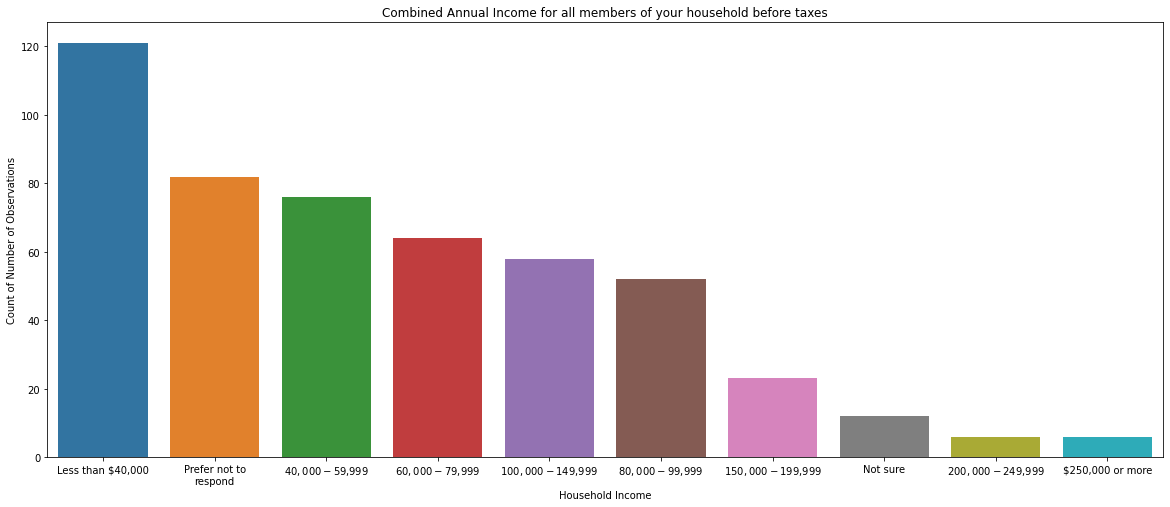

In [ ]:
hh_income_mapping = {
    1: 'Less than $40,000',
    2: '$40,000-$59,999',
    3: '$60,000-$79,999',
    4: '$80,000 -$99,999',
    5: '$100,000-$149,999',
    6: '$150,000-$199,999',
    7: '$200,000-$249,999',
    8: '$250,000 or more',
    98: 'Not sure',
    99: 'Prefer not to respond'
}
hh_income_mapping = {k: hh_income_mapping[k] for k in np.array(pmg_covid_restaurant_copy['HH_INCOME'].value_counts().index) if k in hh_income_mapping}
pmg_covid_restaurant_copy['HH_INCOME'] = pmg_covid_restaurant_copy['HH_INCOME'].replace(hh_income_mapping)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pmg_covid_restaurant_copy['HH_INCOME'].value_counts().index, y = pmg_covid_restaurant_copy['HH_INCOME'].value_counts())
lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
ax.set_title(mapping['HH_INCOME'])
ax.set_xlabel('Household Income')
ax.set_ylabel('Count of Number of Observations')
plt.show()
print("    ")

**What is the highest level of education you have completed?**

**1.** Less than high school

**2.** Some high school

**3.** Completed high school

**4.** Some college/university

**5.** College diploma

**6.** University degree

**7.** Post-graduate

**8.** Prefer not to respond


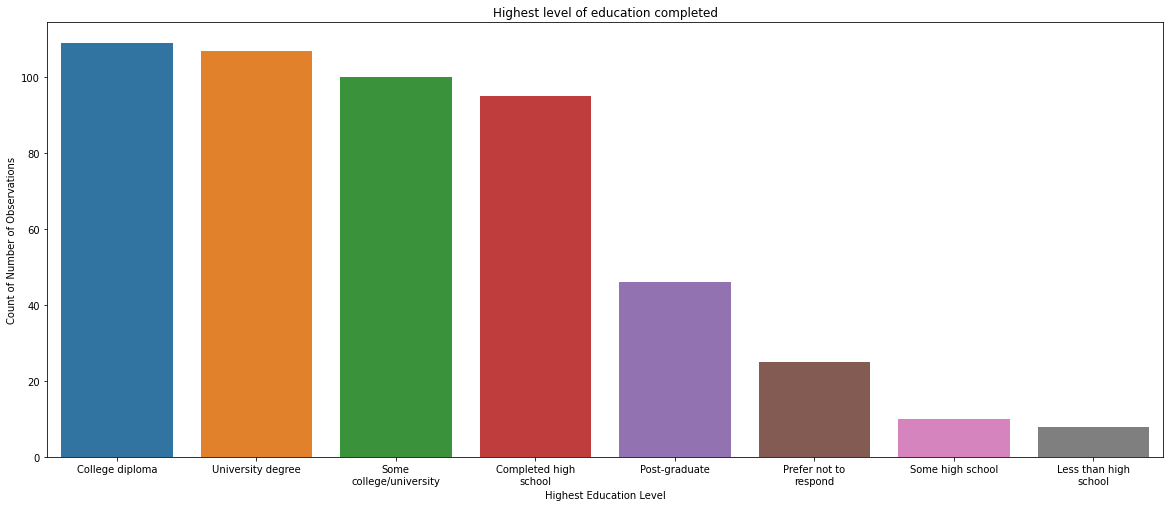

In [ ]:
education_status_mapping = {
    1: 'Less than high school',
    2: 'Some high school',
    3: 'Completed high school',
    4: 'Some college/university',
    5: 'College diploma',
    6: 'University degree',
    7: 'Post-graduate',
    99: 'Prefer not to respond'
}
education_status_mapping = {k: education_status_mapping[k] for k in np.array(pmg_covid_restaurant_copy['EDU'].value_counts().index) if k in education_status_mapping}
pmg_covid_restaurant_copy['EDU'] = pmg_covid_restaurant_copy['EDU'].replace(education_status_mapping)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pmg_covid_restaurant_copy['EDU'].value_counts().index, y = pmg_covid_restaurant_copy['EDU'].value_counts())
lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
ax.set_xticklabels(('\n'.join(wrap(l, 20)) for l in lst), rotation='horizontal', fontsize=10)
ax.set_title(mapping['EDU'])
ax.set_xlabel('Highest Education Level')
ax.set_ylabel('Count of Number of Observations')
plt.show()
print("    ")

**Which of the following best describes your employment status?**

**1.** Employed full-time 

**2.** Employed part-time, or consulting 

**3.**Self-employed professional

**4.** Business owner

**5.** Stay-at-home parent/Homemaker 

**6.** Not currently employed but looking for work

**7.** Not currently employed and not looking for work

**8.** Student

**9.** Retired

**10.** Other

**11.** Prefer not to respond


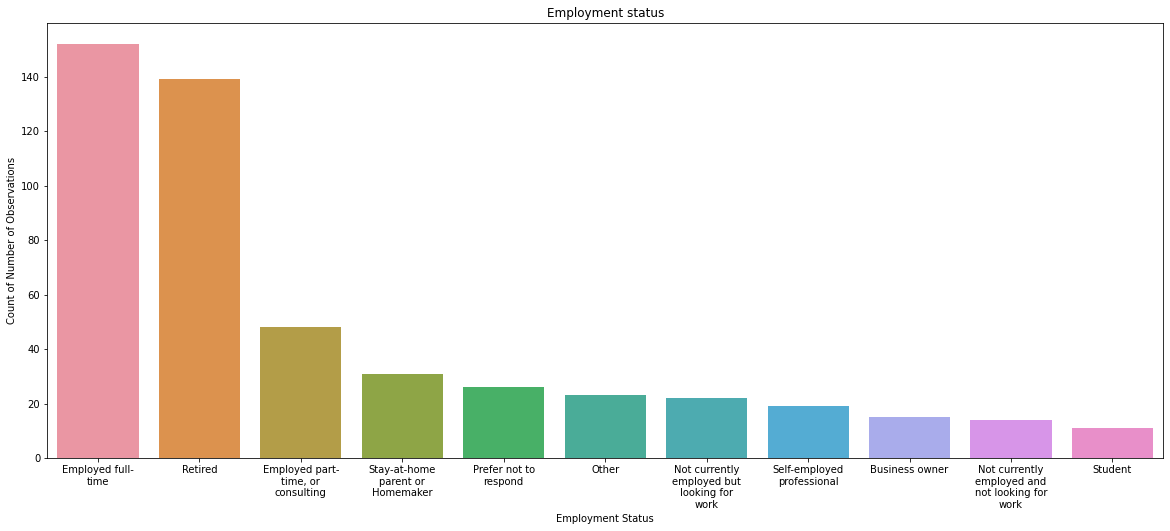

In [ ]:
empl_status_mapping = {
    1: 'Employed full-time', 
    2: 'Employed part-time, or consulting', 
    3: 'Self-employed professional',
    4: 'Business owner',
    5: 'Stay-at-home parent or Homemaker', 
    6: 'Not currently employed but looking for work',
    7: 'Not currently employed and not looking for work',
    8: 'Student',
    9: 'Retired',
    10: 'Other',
    99: 'Prefer not to respond'
}
empl_status_mapping = {k: empl_status_mapping[k] for k in np.array(pmg_covid_restaurant_copy['EMP_STATUS'].value_counts().index) if k in empl_status_mapping}
pmg_covid_restaurant_copy['EMP_STATUS'] = pmg_covid_restaurant_copy['EMP_STATUS'].replace(empl_status_mapping)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pmg_covid_restaurant_copy['EMP_STATUS'].value_counts().index, y = pmg_covid_restaurant_copy['EMP_STATUS'].value_counts())
lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
ax.set_xticklabels(('\n'.join(wrap(l, 15)) for l in lst), rotation='horizontal', fontsize=10)
ax.set_title(mapping['EMP_STATUS'])
ax.set_xlabel('Employment Status')
ax.set_ylabel('Count of Number of Observations')
plt.show()
print("    ")

**What is your gender?**

In [ ]:
# Want to check Unique Values Here since Question is Open-Ended
pmg_covid_restaurant_copy['GENDER_OE'].unique()

array(['female', 'Male', 'Feminin', 'Female', ' ', 'F', 'male', 'M',
       'Female.', 'cisgender woman', 'femme', 'm', 'f', 'femal', 'Woman',
       'FEMALE', '61', 'woman', 'FEMELLE', 'femel', 'famel', '31', 'MALE',
       'mail', 'over here', '56', 'homme', 'mâle', 'ALL MAN', 'Man', 'Fe',
       '62', 'femaile', 'femalw'], dtype=object)

In [ ]:
# Group Male and Female and Other Values Together (Could Be Because of Spelling Errors)
male_values = ['Male', 'male', 'M', 'm', 'MALE', 'mail', 'homme', 'mâle', 'ALL MAN', 'Man']
female_values = ['female', 'Feminin', 'Female', 'F', 'Female.', 'cisgender woman', 'femme', 'f', 'femal', 'Woman',
                 'FEMALE', 'woman', 'FEMELLE', 'femel', 'famel', 'Fe', 'femaile', 'femalw']
other_values = [' ', '61', '31', 'over here', '56', '62']

pmg_covid_restaurant_copy.loc[pmg_covid_restaurant_copy.GENDER_OE.isin(male_values), "GENDER_OE"] = "male"
pmg_covid_restaurant_copy.loc[pmg_covid_restaurant_copy.GENDER_OE.isin(female_values), "GENDER_OE"] = "female"
pmg_covid_restaurant_copy.loc[pmg_covid_restaurant_copy.GENDER_OE.isin(other_values), "GENDER_OE"] = "other"

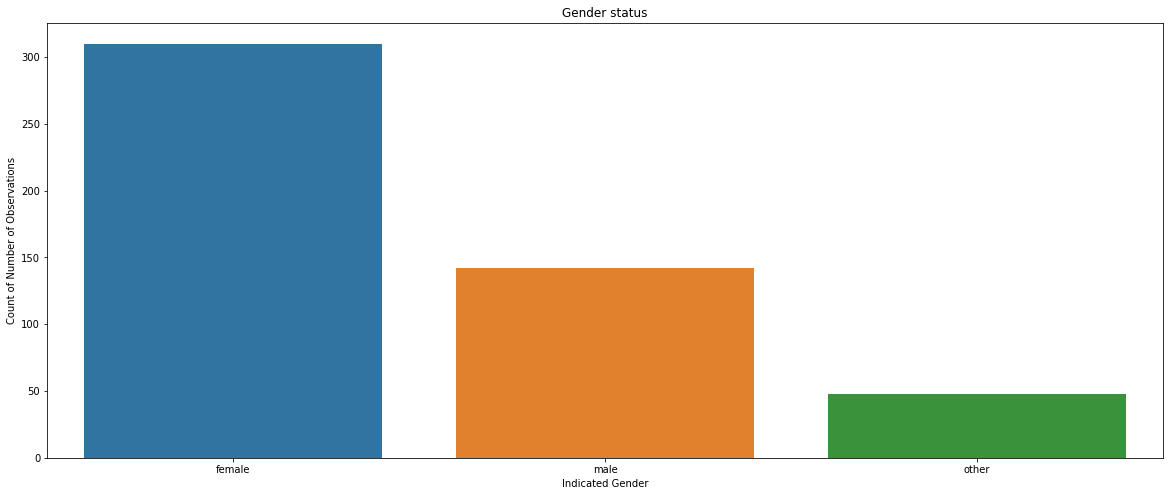

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pmg_covid_restaurant_copy['GENDER_OE'].value_counts().index, y = pmg_covid_restaurant_copy['GENDER_OE'].value_counts())
ax.set_title(mapping['GENDER_OE'])
ax.set_xlabel('Indicated Gender')
ax.set_ylabel('Count of Number of Observations')
plt.show()
print("    ")

**How would you classify the area in which you live?**

**1.** Rural

**2.** Suburban

**3.** Urban

**4.** Not sure

**5.** Prefer not to respond


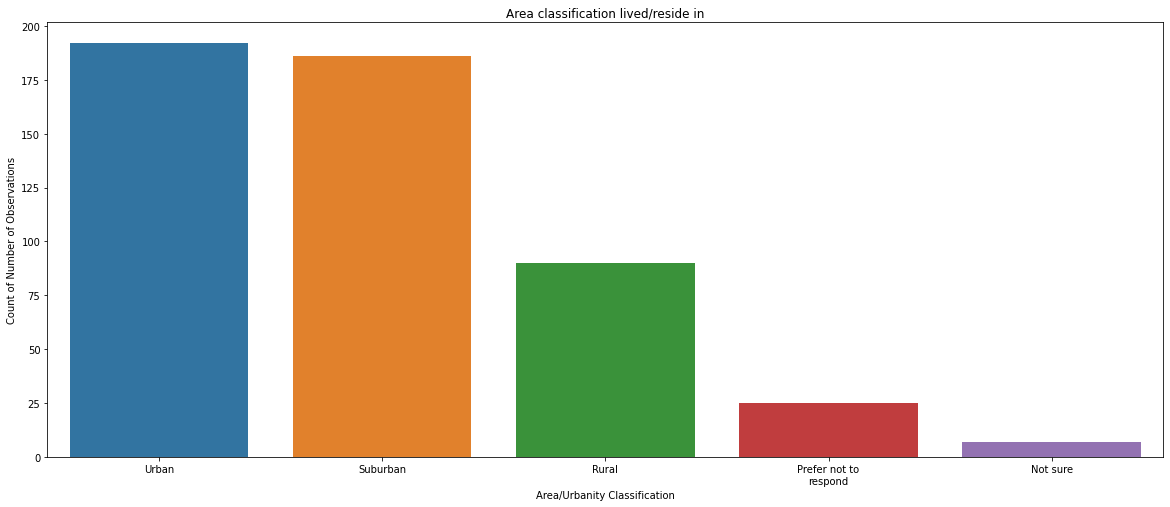

In [ ]:
area_class_mapping = {
    1: 'Rural',
    2: 'Suburban',
    3: 'Urban',
    98: 'Not sure',
    99: 'Prefer not to respond'
}
area_class_mapping = {k: area_class_mapping[k] for k in np.array(pmg_covid_restaurant_copy['URBANITY'].value_counts().index) if k in area_class_mapping}
pmg_covid_restaurant_copy['URBANITY'] = pmg_covid_restaurant_copy['URBANITY'].replace(area_class_mapping)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pmg_covid_restaurant_copy['URBANITY'].value_counts().index, y = pmg_covid_restaurant_copy['URBANITY'].value_counts())
lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
ax.set_xticklabels(('\n'.join(wrap(l, 15)) for l in lst), rotation='horizontal', fontsize=10)
ax.set_title(mapping['URBANITY'])
ax.set_xlabel('Area/Urbanity Classification')
ax.set_ylabel('Count of Number of Observations')
plt.show()
print("    ")

**In which province are you located/reside in?**

**1.** British Columbia

**2.** Alberta

**3.** Saskatchewan

**4.** Manitoba 

**5.** Ontario 

**6.** Quebec

**7.** New Brunswick

**8.** Nova Scotia

**9.** Prince Edward Island

**10.** Newfoundland and Labrador

**11.** Territories

**12.** Prefer not to respond


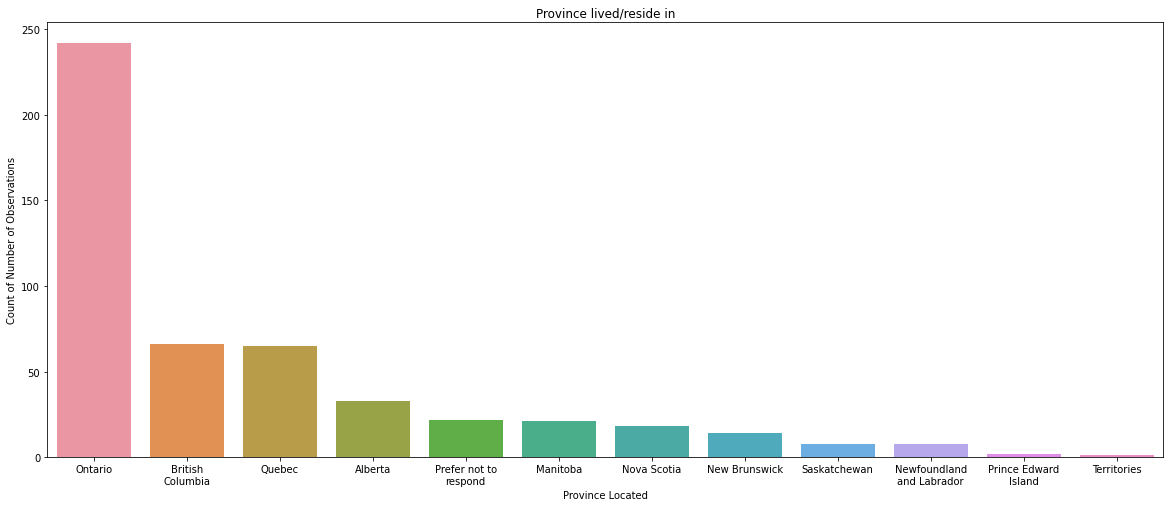

In [ ]:
prov_mapping = {
    1: 'British Columbia',
    2: 'Alberta',
    3: 'Saskatchewan',
    4: 'Manitoba',
    5: 'Ontario', 
    6: 'Quebec',
    7: 'New Brunswick',
    8: 'Nova Scotia',
    9: 'Prince Edward Island',
    10: 'Newfoundland and Labrador',
    11: 'Territories',
    99: 'Prefer not to respond'
}
prov_mapping = {k: prov_mapping[k] for k in np.array(pmg_covid_restaurant_copy['PROV'].value_counts().index) if k in prov_mapping}
pmg_covid_restaurant_copy['PROV'] = pmg_covid_restaurant_copy['PROV'].replace(prov_mapping)
plt.figure(figsize=(20,8))
ax = sns.barplot(x = pmg_covid_restaurant_copy['PROV'].value_counts().index, y = pmg_covid_restaurant_copy['PROV'].value_counts())
lst = [label.get_text() for label in ax.get_xticklabels(minor = False)]
ax.set_xticklabels(('\n'.join(wrap(l, 15)) for l in lst), rotation='horizontal', fontsize=10)
ax.set_title(mapping['PROV'])
ax.set_xlabel('Province Located')
ax.set_ylabel('Count of Number of Observations')
plt.show()
print("    ")

**Further Analysis**

In [ ]:
pmg_covid_restaurant_copy['q11'] = pd.to_numeric(pmg_covid_restaurant_copy['q11'], errors='coerce')

**Mean Average Money Spent PER PERSON when dining at a restaurant between Provinces**

In [ ]:
group = pmg_covid_restaurant_copy.groupby("PROV")["q11"].mean()
group

PROV
Alberta                      32.862069
British Columbia             26.661017
Manitoba                     39.411765
New Brunswick                19.538462
Newfoundland and Labrador    22.142857
Nova Scotia                  25.352941
Ontario                      29.772200
Prefer not to respond        27.888889
Prince Edward Island         24.995000
Quebec                       26.480769
Saskatchewan                 20.000000
Territories                  25.000000
Name: q11, dtype: float64

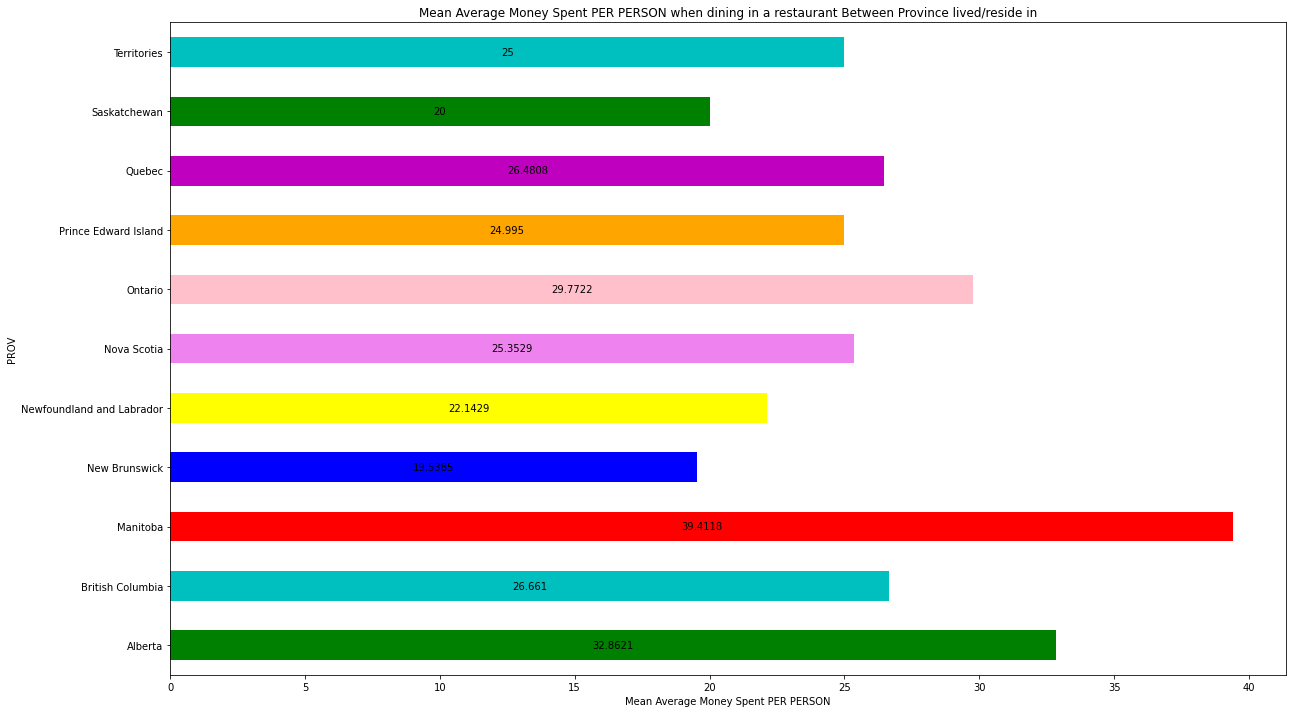

In [ ]:
group = group.drop("Prefer not to respond")

plt.figure(figsize=(20,12))
plt.title("Mean Average Money Spent PER PERSON when dining in a restaurant Between " + mapping['PROV'])
plt.xlabel("Mean Average Money Spent PER PERSON")

ax = group.plot(kind='barh', color=['g', 'c', 'r', 'b', 'yellow', 'violet', 'pink', 'orange', 'm'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

**Mean Average Money Spent PER PERSON when dining at a restaurant between Area Classification**

In [ ]:
group = pmg_covid_restaurant_copy.groupby("URBANITY")["q11"].mean()
group

URBANITY
Not sure                 32.000000
Prefer not to respond    25.904762
Rural                    25.917722
Suburban                 28.693750
Urban                    30.203376
Name: q11, dtype: float64

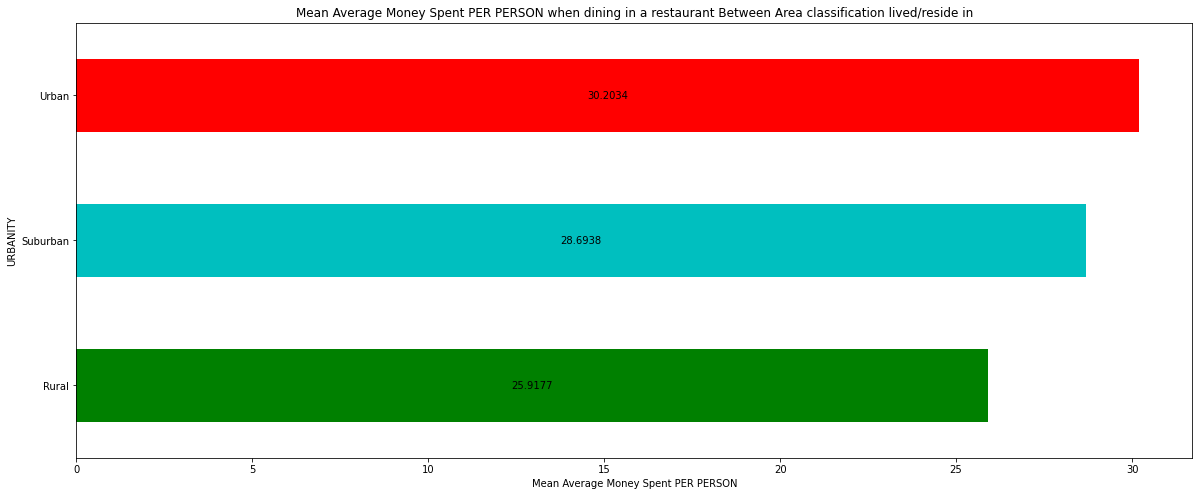

In [ ]:
group = group.drop("Not sure").drop("Prefer not to respond")

plt.figure(figsize=(20,8))
plt.title("Mean Average Money Spent PER PERSON when dining in a restaurant Between " + mapping['URBANITY'])
plt.xlabel("Mean Average Money Spent PER PERSON")

ax = group.plot(kind='barh', color=['g', 'c', 'r', 'b', 'orange'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

**Mean Average Money Spent PER PERSON when dining at a restaurant between Household Incomes**

In [ ]:
group = pmg_covid_restaurant_copy.groupby("HH_INCOME")["q11"].mean()
group

HH_INCOME
$100,000-$149,999        35.094340
$150,000-$199,999        34.347826
$200,000-$249,999        26.666667
$250,000 or more         40.000000
$40,000-$59,999          26.120968
$60,000-$79,999          30.931356
$80,000 -$99,999         27.225000
Less than $40,000        23.980388
Not sure                 27.333333
Prefer not to respond    29.171875
Name: q11, dtype: float64

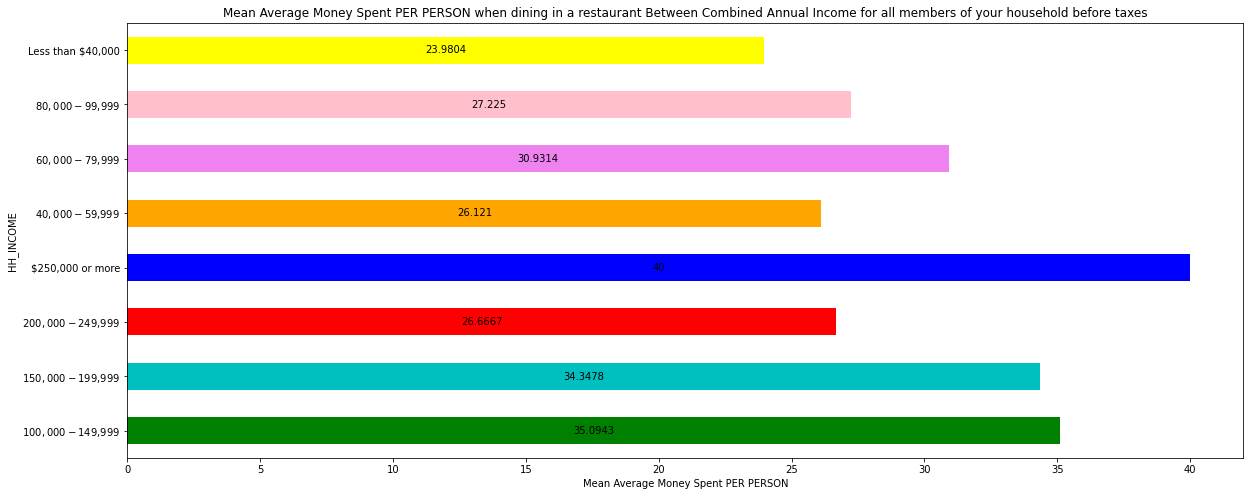

In [ ]:
group = group.drop("Not sure").drop("Prefer not to respond")

plt.figure(figsize=(20,8))
plt.title("Mean Average Money Spent PER PERSON when dining in a restaurant Between " + mapping['HH_INCOME'])
plt.xlabel("Mean Average Money Spent PER PERSON")

ax = group.plot(kind='barh', color=['g', 'c', 'r', 'b', 'orange', 'violet', 'pink', 'yellow'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Text Preprocessing

In [ ]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
punct = string.punctuation
stopwords = list(STOP_WORDS)

In [ ]:
import spacy
import re
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer

# !python -m spacy download en_core_web_sm
# nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner', 'tagger'])
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Getting dictionary of English words and contractions in expansion form
import requests
import ast

requests1 = requests.get('https://raw.githubusercontent.com/dwyl/english-words/master/words_dictionary.json')
requests2 = requests.get('https://raw.githubusercontent.com/kootenpv/contractions/master/contractions/data/contractions_dict.json')

english_dict = ast.literal_eval(requests1.text)
contractions_dict = ast.literal_eval(requests2.text)

In [ ]:
# Text Preprocessing Functions

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punct)
    return text.translate(translator)

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
    
def remove_special_characters(text):
  return re.sub(r'[^\w ]+', "", text)

def cleaning_numbers(text):
    return re.sub('[0-9]+', '', text)

def tokenize_on_text(text):
    tokens = []
    doc = nlp(text)
    text = [tokens.append(str(word)) for word in doc]
    return tokens

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(text):
    text = [lm.lemmatize(word) for word in text]
    return text

def lemmatize(text):
  text = str(text)
  text_lst = []
  doc = nlp(text)

  for token in doc:
    lemma = token.lemma_
    if lemma == '-PRON-' or lemma == 'be':
      lemma = token.text
    text_lst.append(lemma)
  return ' '.join(text_lst)

def remove_invalid_words(text):
  text = text.split(" ")
  text_copy = text.copy()
  for word in text_copy:
    if word not in english_dict:
      text.remove(word)
  return ' '.join(text)

def contractions_expansions(text):
  text = text.split(" ")
  for i in range(len(text)):
    if text[i] in contractions_dict:
      text[i] = contractions_dict.get(text[i])
  return ' '.join(text)

nltk.download('words')
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

def remove_non_english_words(text):
  invalid = ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n',
             'o', 'p', 'q', 'rt', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

  text = text.split(" ")
  text_copy = text.copy()
  for word in text_copy:
    if word in invalid or word not in english_vocab:
      text.remove(word)
  return ' '.join(text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
!pip install spellchecker
# !pip install indexer
from spellchecker import SpellChecker

spell  = SpellChecker()

def spell_check(x):
    correct_word = []
    mispelled_word = x.split()
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

comments = pmg_covid_restaurant['q13']
comments = comments.dropna()
comments

0                                          I do not know
1             nothing I prefer to stay home as recommand
2                                          Delivery only
3      Taking the temperature of every client before ...
4      Ensure guidelines are being followed. Offer re...
                             ...                        
494    Nothing. I'm not comfortable going to a restau...
495    I can cook just fine. I dont need a restaurant...
496    With a 2nd wave, nothing they could do to dine...
498                                   not be too crowded
499    There is nothing but to continue doing what th...
Name: q13, Length: 493, dtype: object

In [ ]:
def fix_sentence(sentence):
  if sentence == "":
    return sentence
  elif sentence[-1] in ["?", ".", "!"]:  
    return sentence
  elif sentence[-1] == ",":              
    return sentence[:-1] + "."
  else:
    return sentence + "." 

comments = comments.apply(lambda text: ' '.join(str(text).split()))
comments = comments.apply(lambda text: fix_sentence(text)) 
comments = comments.apply(lambda text: spell_check(text)) 
comments

0                                          I do not know
1             nothing I prefer to stay home as recommand
2                                          Delivery only
3      Taking the temperature of every client before ...
4      Ensure guidelines are being followed Offer rew...
                             ...                        
494    nothing I'm not comfortable going to a restaur...
495    I can cook just fine I dont need a restaurant ...
496    With a and wave nothing they could do to dine ...
498                                   not be too crowded
499    There is nothing but to continue doing what th...
Name: q13, Length: 493, dtype: object

In [ ]:
import warnings
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')

# Combined all comment recommendations together as one big text
text = comments.str.cat(sep=' ')
text = text.lower()
text = contractions_expansions(text)

In [ ]:
# Used Grammarly to fix spelling errors
text = "I do not know anything I prefer to stay home as recommended delivery only taking the temperature of every client before they enter the restaurant. ensure guidelines are being followed. offer rewards for visits I do not plan on dining in during covid close completely none increase menu options for takeout none at all nothing delivery food is always cold but the time it gets to me.. so I refuse to order delivery from a fine dining restaurant. plus, I live in Canada... patios are not open in the winter on the prairies nothing at this time feeling of being safe have fewer customers at a time. stop adhering to the ridiculous and ineffective government regulations I do not know. make their covid protocols visibly obvious no change - all is fine. covid - overemphasized? childfree section and organic eating options nothing. it is my choice to not want to be around people I do not know. not interested in restaurant eating period nothing follow health protocols nothing wear masks not sure nothing really as I would not go to a restaurant until covid 19 is over and we have a vaccine nothing else none nothing not sure. Following public health rules, there is nothing a restaurant can do. I feel comfortable going into restaurants and eating. I can wait until everything goes back to normal no comment nothing, I just would stay home offer discounts nothing do not get complacent with the regulations. they are there to keep us all safe, or you will be out of business or worse have the virus. . fewer patrons nothing. people, in general, do not know how to use a mask properly. touch their face way too often then touch other things. use the same mask over and over. better service, make us feel safe if we go there, better promotions nothing - its not worth the risk, and being surrounded by plastic and masks is not an experience worth paying for. nothing. I wouldn’t feel safe about anything. they have done all they can. unsure, not sure nothing safety protocol is followed and management enforcement visual cleaning at all times nothing - eating out is not that important to me at this time. unsure somehow show or list what they have done to be safe. not sure they are doing a great job food is handled properly and not mixed/contaminated (meat knife is not used to cut vegetables), sanitation of workspace, safety measures fewer people indoors a restaurant could not do anything. there would need to be zero local covid cases for dining in, nothing.  I would not go. did not we already cover this? masks, physical distancing, sanitization, better ventilation. nil none rien hot waitresses nothing simplify and clearly explain take out options no nothing! - not sure deliver to rural areas. I live 1.2 hrs away from Hanna and there is no food delivery at all. make sure the 6-foot distance is adhered to and extra cleaning does not know the personal safety probably anything!? nothing limits the number of guests. nothing offer specials more mask-wearing nothing be very well covered in ppe and increased distancing assure that the meals are prepared with the utmost protection from covid, pay without contact and distancing with any client while picking up the food nothing I won’t go anyways not sure provide hand sanitizer and enforce social distancing rules. at least one table between patreons I would prefer to call the restaurant and put an order in to pick up.  third party delivery takes too high a percentage from the restaurant nothing much, we do not know who is sick with covid-19. very limited seating and few customers allowed with all necessary safety precautions taken nothing nothing nothing follow all pandemic protocols nil none beside limiting the number of customers, it’s important to have a good circulation... while it’s very unlikely to dine outdoor during cold weather, keep the door or windows open is another option nothing not much other than what they are doing now as long as all staff wear masks and gloves I would never feel comfortable in a restaurant during covid 19 I cannot think of anything they have not already thought of... just keep up with cleaning nothing find a cure for covid :) nothing precaution with a second wave and if the numbers get too high, I would not attend a restaurant for indoor or outdoor seating so that part of their operation should close.  delivery and takeout should still be an option. rien due to health issues I prefer to eat at home - so curbside pick-up or delivery is the most comfortable for me no matter what has every employee adhere to always adhere current covid-19 precautionary standards, including face masks and shields. some folks are showing covid-19 fatigue and are not as inclined to be as diligent as a month or two ago. answered previously nothing no contact delivery and takeout they are doing the best they can nothing nothing nothing making sure all protocols are in place just make sure everything is clean and sanitized and staff wear a mask nothing, I prefer to stay home post all actions are taken to ensure safety follow through on all the guidelines nothing none nothing they are doing it all clean none switch to only take out and delivery during the second wave guarantee the minimum distance requirements are kept; all staff and guests wear masks to their tables; explanations of what the restaurant has done to protects its employees and its guests. not sure close contact tracing I would not feel comfortable going to any restaurant if a second wave occurs. I will wait until it is all over before I go out and eat ok nothing keep cleaning.  extreme caution with the food.  discounts. reduce price masks worn by all employees at all times, sanity, social distancing I will eat in a restaurant during these times half capacity to ensure proper distancing to build trust, use of gloves, masks, etc. available sanitizers nothing nothing nothing nothing not sure na being extra clean only offering delivery and takeout for pick-up. be spotless nothing there is nothing that will make me comfortable until there is a vaccine, in the meantime, I am only going to drive through but a lot less. be very very careful with their sanitation efforts. nothing. we need a vaccine not sure... nothing automation nothing I do not know I worry too much about being infected by covid close for indoor dining nothing. I would not be able to visit one not sure have specific guidelines put in place for employees; delivery drivers and customers. I would feel more comfortable if the restaurant gave discounts or incentives to customers for choosing delivery or take out. nothing, I'm fine with a second surge nothing more temperature checks nothing close dining in completely and just deliver and provide curbside pickup for now nothing. until covid has passed I will not be dining in, I have asthmatic children and I will not take unnecessary risks that could jeopardize their health. dining in a restaurant is not a necessity. be aware of extra sanitizing none following all rules nothing being serious about the covid-19 clean table before we sit down show attention to protocol nothing...need to have a vaccine to get this pandemic under control. it’s just not worth the risk. if I miss the food at a specific restaurant I will do take out instead to limit my risk. take covid seriously and follow guidelines and capacity limits instead of waiting until cases happen. also when cases happen they need to shut down instead of not telling anyone and resuming operation. the way restaurant owners have acted during covid has been extremely selfish and money-driven host availability to assure customers nothing - I just will not feel comfortable until there is far less of the virus about and/or there is a good vaccine and the majority of the population has been vaccinated. by limiting the number of people inside I would prefer not to eat at a restaurant should there be a second wave. I would prefer curbside pick-up. nothing none clean better air filtration systems ensure protons are being respected nil not sure,  since the outbreak I have only been to a restaurant 3 times, so if a 2nd wave occurs, then I am likely not to go at all assure me of cleaning. nothing. it depends on me & when I will feel comfortable leaving home for an unnecessary trip/exposure. restaurants are not safe just be aware of hazards nothing I would not be comfortable at this time just following protocols there is nothing they could do I would not be comfortable eating anywhere except at home where I know that the environment is safe simply ensure and guarantee more sanitary measures. do know nothing keep everything clean I would stay home being comfortable at the kosher places I go to doing everything they can to follow the protocols and even going beyond right now I still don't feel comfortable going out so most meals are made at home until our levels drop again but so far there are many cases again happening so we're in the   2nd wave of this and hope they close somethings down again to help battle this nothing. I am staying home at all costs to protect myself and mine. nothing for indoor dining we just do not do it.  keep the driver clean and safe. I think we are in the second wave. just keep the groups small and the tables far apart probably nothing as if a second wave were to occur, there may be another lockdown. nothing st h6  9thing comes to mind nothing for dine-in, its too risky with covid right now nothing they can do on guarantee vivid precautions in place fewer people spacing very high standard for cleaning and prevention don't think it can nothing I would not want to take a chance getting covid 19 physical distancing dividers, physically distance clients, masks for staff lower prices nothing provide info on what safety measures they are taking stay open nothing else. there is nothing else that they could do at the moment - I'm just not going to be comfortable until the pandemic is over. not much nothing na nothing unsure not sure nil nothing so long as there is social distancing and masks required when not eating, providing hand sanitizers and maintaining a spotless facility, there is not much else that could be done. nothing until the second wave was over. make sure all the employees keep the health measures in place. not sure more spaced out to make it more affordable to place food in a personal container. I just feel it’s me that I am very picky when it comes to eating out do not know not sure staff wears PPE, tables very far apart, additional sanitization and air filter and ventilation nothing at this time be vocally and visibly proactive more focus on sanitation not sure ensure safety protocols in place nothing. it is just not worth it to dine out anymore. physical distancing and more cleaning and everyone with masks and hand sanitizer being available to enforce the rules, encourage short visits to minimize alcohol intake and resultant careless behavior it depends on how bad it gets again. nothing even if all protocols were being followed I still would not feel comfortable unsure cannot think of anything new that has not been mentioned. na nothing no covid-19 being over. nothing - I do not like eating in a restaurant, and believe they are doing everything they can to keep people happy/safe for delivery/takeout I'm fine with things covid is blown way out of proportion not have covid 19 all of the measures I outlined on the previous screen nothing wearing masks by the staff, put sanitizers available, respect the public health nothing do not use anything! nothing else that I can think of really. nothing nothing more protection I have had no concerns so far and I am happy with how things are being handled in my town nothing I would be very particular regarding where I go.  if I had a bad experience somewhere, in particular regarding cleaning and sanitization, then I will not go there again.  first impressions make a huge mark.  or even walking/driving by a place a taking note of what is going on.  I'm always on the watch.  right now, there is mainly one local place I trust to dine in or take out. nothing. they are doing the best they can nothing not previously mentioned offers better deals in the restaurants I would go to have the protocols in place to keep people distanced at all times, and continuously sanitize not sure, I think they are doing everything they can. ok, just the standard protocols not much not sure some of it is not due to the restaurants but rather government/media info not being clear ex. is the virus air-born? there are still differing opinions. limit people be clear on their precautions taker no idea nothing not sure firm strict protocol nothing... not sure wear masks, use hand sanitizer, clean well, social distancing continue to follow guidelines. no comment unsure nothing really as it is healthier for me took cook for self nothing air filters higher exchange rate nothing not sure, I do not typically eat at restaurants nothing as it is the unknown that worries me (what can not be seen) un bon menu pours livraison tables at least 2m apart, reservations only with cleaning in between sealed foods they are doing well at this time. wear masks, gloves and have sanitation procedures in process wear masks properly nothing nothing nothing more air filters not sure as they already do is good make sure everyone habits the rules not sure nothing, not a thing because if a 2nd wave hit we know it will be worse than the first wave communicate clearly about the steps taken to ensure no contamination as food parcels are handled by servers, carriers, delivery people nothing the outdoor sidewalk places seem crowded and oblivious to risks and I avoid them all. seems the establishments are cynical opportunists who do nothing for safety.  the patios were supposed to be safer not crowded. follow rules paper plates not sure nothing keep the staff from getting covid offer counseling. at this time there is nothing as it is in my mind that I would rather cook my food. have precautions in place be happy coupons nothing. social distancing and masks when not eating anything, I would order only from well known old-time used ones feel very comfortable cleaning not too much - my families safety comes first there’s nothing they can do. we need a vaccine. nothing increased sanitization nothing when the second covid way comes more cleaning not sure nothing I think most are doing as much as they can give the circumstances. not much sadly nothing nothing nothing I just do not feel comfortable eating out or doing take-out clean environment social distancing, good cleaning and they can’t. it’s my well-being that I want to take care of and the people in my bubble. we do not eat out much because of our age! nothing I would not feel safe be visibly concerned about the covid situation not much if/when a 2nd wave hits no nothing reassurance of measures taking place security for everything nothing not sure need to. ensure the 6 feet distance between tables is in place none offer to bring food out to the vehicle and have the person delivering it wearing a mask nothing practice social distancing nothing you provide sinks to wash hands with soap and water. nothing, it is merely me being cautious unsure nothing have waiters wear masks to make sure that the restaurant is truly sanitized clean social distancing for table service indoors or out, nothing. follow government protocol and some more precautions of their own - ensure social distancing by those picking up their delivery order staff all vaccinated and covid tested at least once a week! put the price down at a minimum, the safety protocols that have been suggested. these must be enforced before things change for the good. I do not know I'm not worried at all why do you keep asking the same question? offer freebies reasonable prices and cleanliness I am a senior and will stay in as much as possible. delivery is the most reasonable option for me. make sure food is being prepared safely and that delivery is contactless. I will follow guidelines that say stay home as much as possible. lose the masks. I feel like I'm some sort of disgusting virus carrier when they approach me masked provide all information re safety protocols but ultimately trust is the issue here nothing signage which outlines cleaning practices. have curbside delivery only. do the talk and not the walk when it comes to safety first unsure nothing reassurance that food and utensils are not contaminated because they have taken all precautions needed nothing proper use of masks and someone minoring use nothing more thorough cleaning. separate preparation of takeout and delivery I do not know what they could do to make me want to eat indoors. no comment limit the number of clients in the restaurant and continue following cleaning protocols face masks, and social distance and cheaper keep cleanliness and sanitizing a priority. I don't think anything, unfortunately, nothing.  we do not consider going to any restaurant (for now) nothing more than now have less than 15 people indoors cheaper ensure every safety measure is being considered and practiced by staff and patrons tell us how they are keeping the area clean and see that it is clean when was the last time a door handle inside and out was sanitized?  washroom partitions sanitized, floors and carpets washed extracted. I’m just choosing to not go I already said I feel very comfortable going to the restaurants if the health authorities do not decide to shut them down again and play with people's lives nothing if this virus gets bad enough I am not sure if anyone would even go to one. sanitizing is the absolute necessity as we have noticed that because there is not enough staff and they are too busy with orders they are not keeping up with the cleaning at all. not sure have fewer customers in the restaurant and frequent sanitation don't think there is anything that can be done nothing distancing between tables, sanitary precautions, air filters beside tables wear masks nothing it’s been covered I try earlier questions none have completely closed off spaces around tables spacing of people, barriers to stop covid and not sure if they could do anything if there is indeed a second wave nothing unless or until there is an effective vaccine available for all. nothing. I already feel comfortable because I do not believe covid19 is what they say. unfortunately, not much right now ;( nothing.  it is the public that needs to take extra measures to ensure that everyone is safe. a clean routine that each server may follow I have felt comfortable taking full measures for protection at all times visible cleaning nothing, it's not their fault. most places here where I live have sanitizer available and masks on their workers. show signs of how they are keeping you safe nothing right now nothing. need a vaccine before I will feel safe again have proper signs wear masks and offer to pick up put all safety measures in place posting safety protocols no observe all..good heath recommendations follow the health protocols nothing follow the health guidelines. nothing nothing. I'm not comfortable going to a restaurant. makes no sense that you need to wear your mask to go sit at your table, but then you can take it off to eat. might as well not wear a mask at all as the risk is the same. I can cook just fine. I don't need a restaurant to feed me. my relationship with my elderly parents is far more important with a 2nd wave, nothing they could do to dine indoors or outdoors. not be too crowded there is nothing but to continue doing what they are doing at this point."

text

"I do not know anything I prefer to stay home as recommended delivery only taking the temperature of every client before they enter the restaurant. ensure guidelines are being followed. offer rewards for visits I do not plan on dining in during covid close completely none increase menu options for takeout none at all nothing delivery food is always cold but the time it gets to me.. so I refuse to order delivery from a fine dining restaurant. plus, I live in Canada... patios are not open in the winter on the prairies nothing at this time feeling of being safe have fewer customers at a time. stop adhering to the ridiculous and ineffective government regulations I do not know. make their covid protocols visibly obvious no change - all is fine. covid - overemphasized? childfree section and organic eating options nothing. it is my choice to not want to be around people I do not know. not interested in restaurant eating period nothing follow health protocols nothing wear masks not sure nothi

**Summarizing Text of Comments Regarding Question:**

**What could a restaurant do to help make you feel more comfortable?)**

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 52.9 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
     |████████████████████████████████| 895 kB 61.3 MB/s 
     |████████████████████████████████| 596 kB 48.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 (https://huggingface.co/sshleifer/distilbart-cnn-12-6)


Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

In [ ]:
max_chunk = 500
text = text.replace('.', '.<eos>')
text = text.replace('?', '?<eos>')
text = text.replace('!', '!<eos>')

sentences = text.split('<eos>')
current_chunk = 0 
chunks = []
for sentence in sentences:
    if len(chunks) == current_chunk + 1: 
        if len(chunks[current_chunk]) + len(sentence.split(' ')) <= max_chunk:
            chunks[current_chunk].extend(sentence.split(' '))
        else:
            current_chunk += 1
            chunks.append(sentence.split(' '))
    else:
        print(current_chunk)
        chunks.append(sentence.split(' '))

for chunk_id in range(len(chunks)):
    chunks[chunk_id] = ' '.join(chunks[chunk_id])

0


In [ ]:
res = summarizer(chunks, max_length=150, min_length=30, do_sample=False)
' '.join([summ['summary_text'] for summ in res])

' "I would not go to a restaurant until covid 19 is over and we have a vaccine nothing else" "It is my choice to not want to be around people I do not know.  I prefer to stay home as recommended delivery only takes temperature of every client before they enter the restaurant.  ensure guidelines are being followed.   ensure .  ensure  guidelines are . being followed .    stop adhering to the ridiculous and ineffective and ineffective government regulations I do .  make their covid protocols visibly obvious no change - all is fine.  Childfree section and organic eating options .  There is no food delivery at all at Hanna and there is no take out at all . I would prefer to call the restaurant and put an order in to pick up . I cannot think of anything they have not already thought of .  I would not feel comfortable going to any restaurant if a second wave occurs . I would feel more comfortable if the restaurant gave discounts or incentives to customers for choosing delivery or take out . 

**Using LDA (Latent Dirichlet Allocation) for Topic Analysis of q13 (What could a restaurant do to help make you feel more comfortable?)**

In [ ]:
# Inspection of First 5 Rows of Text Column q13 originally
pmg_covid_restaurant['q13'].head(20)

0                                         I do not know
1            nothing I prefer to stay home as recommand
2                                         Delivery only
3     Taking the temperature of every client before ...
4     Ensure guidelines are being followed. Offer re...
5               I do not plan on dining in during COVID
6                                      Close completely
7                                                  none
8                     Increase menu options for takeout
9                                           none at all
10                                              Nothing
11                                              nothing
12    delivery food is ALWAYS cold byt he time it ge...
13                                 Nothing at this time
14                               Feeling of being  safe
15                       Have less customers at a time.
16    stop adhering to the ridiculous and ineffectiv...
17                                        I don'

In [ ]:
# Modifying text column q13 using text preprocessing
pmg_covid_restaurant['q13'] = pmg_covid_restaurant['q13'].apply(lambda text: str(text).lower())
pmg_covid_restaurant['q13'] = pmg_covid_restaurant['q13'].apply(lambda text: ' '.join(text.split()))
pmg_covid_restaurant['q13'] = pmg_covid_restaurant['q13'].apply(lambda text: contractions_expansions(text))
pmg_covid_restaurant['q13'] = pmg_covid_restaurant['q13'].apply(lambda text: remove_special_characters(text))
pmg_covid_restaurant['q13'] = pmg_covid_restaurant['q13'].apply(lambda text: cleaning_punctuations(text))
pmg_covid_restaurant['q13'] = pmg_covid_restaurant['q13'].apply(lambda text: cleaning_numbers(text))
pmg_covid_restaurant['q13'] = pmg_covid_restaurant['q13'].apply(lambda text: remove_invalid_words(text))
pmg_covid_restaurant['q13'] = pmg_covid_restaurant['q13'].apply(lambda text: remove_non_english_words(text))
pmg_covid_restaurant['q13'] = pmg_covid_restaurant['q13'].apply(lambda text: cleaning_stopwords(text))

In [ ]:
# Inspection of Text Column q13 after Text Preprocessing
pmg_covid_restaurant['q13'].head(20)

0                                                  know
1                            prefer stay home recommand
2                                              delivery
3            taking temperature client enter restaurant
4                                          ensure offer
5                                     plan dining covid
6                                      close completely
7                                                      
8                                         increase menu
9                                                      
10                                                     
11                                                     
12    delivery food cold time refuse order delivery ...
13                                                 time
14                                         feeling safe
15                                                 time
16               stop ridiculous ineffective government
17                                              

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
# Compute coherence scores mapping to each number of topics in a Dictionary format after using LDA model

def coherence_scores_per_num_topics(dictionary, corpus, texts, start, stop):
    num_topics_and_coherence_scores = {}
    lda_models = []
    for num_topics in range(start, stop, 1):
        model = gensim.models.ldamodel.LdaModel(corpus = corpus, num_topics = num_topics, id2word = dictionary)
        lda_models.append(model)
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        num_topics_and_coherence_scores[num_topics] = coherencemodel.get_coherence()

    return num_topics_and_coherence_scores, lda_models

In [ ]:
import warnings
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')

from gensim.corpora.dictionary import Dictionary

def optimal_num_topics(column_name, start, stop):
  # List of Texts in a Column that Are Tokenized
  text_lst = pmg_covid_restaurant[column_name]
  text_lst = [text for text in text_lst if text != '' and text != ' ' and text != 'none' and text != 'na' and text != 'nan']
  tokenized_texts = [tokenize_on_text(text_lst[i]) for i in range(len(text_lst))]

  # Create a Dictionary and Document Term Matrix Corpus
  dictionary = Dictionary(tokenized_texts)
  doc_term_matrix = [dictionary.doc2bow(tok) for tok in tokenized_texts]

  # Coherence Scores for Each Number of Topics After Using LDA Model 
  # Also get List of LDA Models for Each Number of Topics ranging from 2 to 25 topics 
  num_topics_with_coherence_scores, models = coherence_scores_per_num_topics(dictionary, doc_term_matrix, tokenized_texts, start, stop)

  # Show graph displaying Coherence Scores per Number of Topics
  lists = sorted(num_topics_with_coherence_scores.items())       # sorted by key, return a list of tuples
  num_topics, coherence_scores = zip(*lists)                     # unpack a list of pairs into two tuples
  plt.plot(num_topics, coherence_scores)
  plt.xlabel("Number of Topics")
  plt.ylabel("Coherence Score")
  plt.title("Coherence Scores per Number of Topics")

  # Graph the Coherence Scores and Number of Topics 
  plt.show()
  print("           ")
  print("           ")
  
  # Getting the Ideal Number of Topics with the Maximum Coherence Score
  num_topics_with_max_coherence_score = max(num_topics_with_coherence_scores, key = num_topics_with_coherence_scores.get)
  print("Number of Topics with the Maximum Coherence Score is: ", num_topics_with_max_coherence_score)
  print("This Optimal Number of Topics has a Coherence Score of: ", num_topics_with_coherence_scores[num_topics_with_max_coherence_score]) 
  return dictionary, doc_term_matrix, models[num_topics_with_max_coherence_score - 2]

**What could a restaurant do to help make you feel more comfortable?**

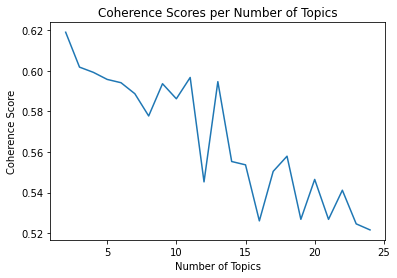

           
           
Number of Topics with the Maximum Coherence Score is:  2
This Optimal Number of Topics has a Coherence Score of:  0.6190070542742829


[(0,
  '0.036*"sure" + 0.020*"covid" + 0.016*"comfortable" + 0.012*"time" + 0.012*"delivery" + 0.012*"cleaning" + 0.012*"know" + 0.011*"follow" + 0.011*"feel" + 0.011*"think"'),
 (1,
  '0.028*"restaurant" + 0.016*"covid" + 0.014*"sure" + 0.013*"wave" + 0.012*"feel" + 0.012*"clean" + 0.011*"delivery" + 0.010*"wear" + 0.010*"cleaning" + 0.010*"second"')]

In [ ]:
# Print topics with Optimal Number of Topics
dictionary, doc_term_matrix, model_with_optimal_num_of_topics = optimal_num_topics('q13', 2, 25)
model_with_optimal_num_of_topics.print_topics()

In [ ]:
# Evaluation of the model
print('Perplexity: ', model_with_optimal_num_of_topics.log_perplexity(doc_term_matrix, total_docs = 10000))  

Perplexity:  -5.920841724070401


In [ ]:
# Visualize the topics for optimal number of topics 
pyLDAvis.enable_notebook()
visualization = gensimvis.prepare(model_with_optimal_num_of_topics, doc_term_matrix, dictionary)
visualization

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.027176  0.0       1        1  52.737684
0     -0.027176  0.0       2        1  47.262316, topic_info=           Term       Freq      Total Category  logprob  loglift
8    restaurant  19.000000  19.000000  Default  30.0000  30.0000
53         sure  26.000000  26.000000  Default  29.0000  29.0000
29         time   7.000000   7.000000  Default  28.0000  28.0000
159       think   6.000000   6.000000  Default  27.0000  27.0000
72          use   5.000000   5.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
82           nt   3.189064   6.435843   Topic2  -5.1047   0.0473
158       staff   3.362038   7.912916   Topic2  -5.0519  -0.1065
1          home   3.215105   7.925742   Topic2  -5.0966  -0.1528
185       clean   3.320622  10.154869   Topic2  -5.0643  -0.3683
168        wave   3.071903  10.922614   Topic2  -5.1422  -0.5191

[145 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
418       2  0.711097  absolute
248       1  0.237282       air
248       2  0.711846       air
303       1  0.473590   believe
303       2  0.473590   believe
...     ...       ...       ...
168       1  0.732425      wave
168       2  0.274660      wave
52        1  0.594414      wear
52        2  0.396276      wear
30        2  0.712039    winter

[168 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])